In [1]:
# %load std_libraries.py
# If I make many files here, would be good to do this
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
location_dict = {'a': "C:\\Users\\heine\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",'c':'you need to add your location to the location_dict'}
base_dir_rna_seq = location_dict[location_input]
print("rna_seq base directory is " + base_dir_rna_seq)

if sys.path[-1] != base_dir_rna_seq:
    sys.path.append(base_dir_rna_seq)
    print("Added " + base_dir_rna_seq + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

base_dir = os.path.normpath("C:/Users/heine/Google Drive/UCSF/Yeast_colony_drop_seq")
data_processing_dir = os.path.normpath(base_dir + os.sep + "data")
#base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colorbar as mpl_colorbar
import matplotlib.colors as mpl_colors
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.SeqRecord import SeqRecord
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

# from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Bens, b = gpucluster, c = other   a
rna_seq base directory is C:\Users\heine\github\expression_broad_data
Added C:\Users\heine\github\expression_broad_data to path: 
['', 'C:\\Users\\heine\\Anaconda3\\python36.zip', 'C:\\Users\\heine\\Anaconda3\\DLLs', 'C:\\Users\\heine\\Anaconda3\\lib', 'C:\\Users\\heine\\Anaconda3', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\heine\\.ipython', 'C:\\Users\\heine\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Bens, b = gpucluster, c = other   a
base directory is C:\Users\heine\github\expression_broad_data
data

In [2]:
ARO4_lib_data = pd.read_table(data_processing_dir + os.sep + "out_gene_exon_tagged_2000.dge.txt")
ARO4_lib_data.set_index('GENE', inplace = True)

In [4]:
print("The total number of reads is {}".format(ARO4_lib_data.sum().sum()))

The total number of reads is 6793535


In [5]:
gene_sums = ARO4_lib_data.sum(axis=1)
gene_sums.sort_values()[-10:]

GENE
RPL29         80751
CUP1-1        83270
CUP1-2        83837
YNR034W-A     91366
RPS31         92685
RPL41A       102192
HSP12        110425
STF2         116797
TMA10        119485
HOR7         183627
dtype: int64

These are the genes with the most total reads.  These could be the genes that are most highly expressed in the big colonies, so those with a growth defect would not show up here. 

TMA10 and STF2 are paralogs.  top four are stress responsive.  Strange to me that HOR7 would be so highly expressed. 

In [6]:
ARO4_lib_data.loc['STF2'][ARO4_lib_data.loc['STF2']>0 ]

AGGTTAGACG    513
CTGTCATTGT    506
CTTGTGTCAG    629
CAGGCCTTCC    604
TAATTCGCCT    485
AAGAGTTACA    378
AATAGTTAGG    510
CCAAGTGTTT    403
GGCCGTTACA    485
CTGAGGTTTC    441
CGGCTCACCC    432
ATTCTTAGTA    405
ACATCTCACT    450
TTGGTCCTTT    463
AGGACGTTAA    463
AGTGCGCCAA    485
GTCCTGTCAT    464
GCCTTGGTAC    360
GGGGTCCTTC    402
TTGTAGAATT    385
ATTCGTGAAT    429
GCTAGATATG    317
CAGGTTGTCT    454
TTTTAGAAAC    401
ATCGCTATCC    325
CAGCATTATG    494
TTTTTCCGCG    346
CTGCCATGGC    353
ACTCGGAGGA    402
CTCACCTTCC    482
             ... 
TCTATCTATC      6
ACCTCATGCG     25
ACGCGTTTTC      2
GTTTGGTGAC     15
TGGCGCAGTT     21
AACGGAACCG      5
CGAGTCTCTA     23
TATAATGGAG      3
GACGATCACC     28
TGGTGAGGAC      2
AAAATCTCTG      4
ATCCCCGAAC      3
TGAGCTCCTA     23
TAGGCTAAAT     27
CTGTACAGGC      6
GTATCACCGG      6
CTGCCCACGT      9
CATATGGGGA     18
TAAGTGACCC      5
GCCATTCACT     35
TCTTCGTTAA      3
TATTTTCATG     35
TCAATAGATA      4
CGTGTTGGCC      2
TGGTTGATTG

<IPython.core.display.Javascript object>


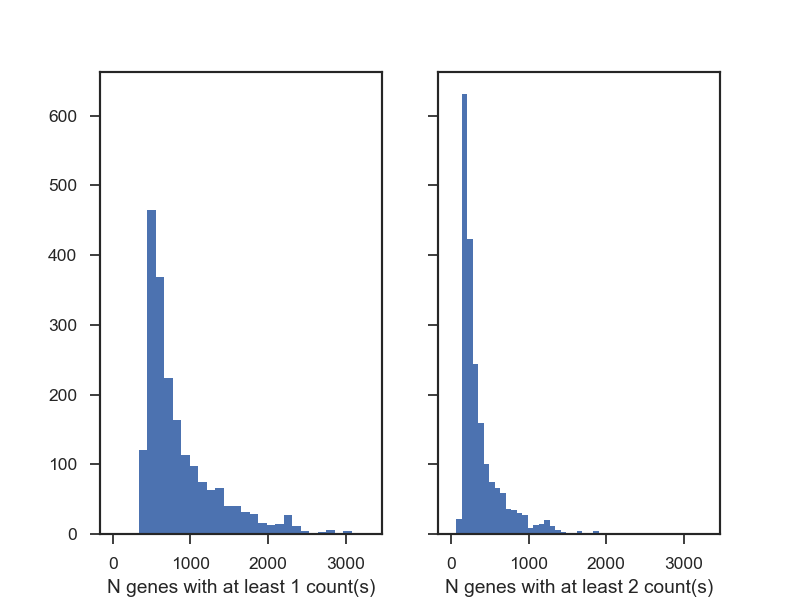

1642
415


In [7]:


fig, axarr = plt.subplots(1,2, sharex = True, sharey = True)

mincounts = 2 
for jj, mincounts in enumerate([1,2]):       #1,2,3,5,10,20
    ax = axarr.flatten()[jj]
    ngenes = []
    for column in ARO4_lib_data.columns:
        ngenes_gt_mincounts = len(ARO4_lib_data[column][ARO4_lib_data[column]>=mincounts])
        ngenes.append(ngenes_gt_mincounts)
    print(len([nn for nn in ngenes if nn>=500 ]))
    ax.hist(ngenes,bins=30)
    ax.set_xlabel("N genes with at least " + str(mincounts) + " counjt(s)")

    
plt.savefig(os.path.normpath(base_dir + os.sep + "analysis" + os.sep + "20180726_hist_N_genes_raw.svg" ))

In [3]:
#Filter cells to just get ones with more than 500 genes expressing more than 1 count. 

mincounts = 1 
ngenes = []
thresh_genes = 500
cells_above_thresh = []
for cell in ARO4_lib_data.columns:
    ngenes_gt_mincounts = len(ARO4_lib_data[cell][ARO4_lib_data[cell]>=mincounts])
    ngenes.append(ngenes_gt_mincounts)
    if ngenes_gt_mincounts >=500: 
        cells_above_thresh.append(cell)

ARO4_lib_data_mincount = ARO4_lib_data.loc[:,cells_above_thresh]

#Add a row for total counts and sort descending by that row. 
ARO4_lib_data_mincount_total = ARO4_lib_data_mincount.sum()
ARO4_lib_data_mincount_total.name = 'total_counts'
ARO4_lib_data_mincount = ARO4_lib_data_mincount.append(ARO4_lib_data_mincount_total)
ARO4_lib_data_mincount.sort_values(by='total_counts', axis = 1, ascending = False, inplace=True)

ARO4_lib_data_mincount_genes = ARO4_lib_data_mincount.drop('total_counts')


#Normalize by total counts - this takes a while - I am sure there is a faster way.  
ARO4_lib_data_mincount_genes_norm = ARO4_lib_data_mincount_genes.copy()
ARO4_lib_data_mincount_genes_sum = ARO4_lib_data_mincount_genes.sum()
med = ARO4_lib_data_mincount_genes_sum.median()
for col in ARO4_lib_data_mincount_genes.columns:
    ARO4_lib_data_mincount_genes_norm[col] = ARO4_lib_data_mincount_genes[col]/ARO4_lib_data_mincount_genes_sum[col]*med

# #sort genes by summed expression
# ARO4_high_exp_genes_norm['gene_totals'] = ARO4_high_exp_genes_norm.sum(axis=1)
# ARO4_high_exp_genes_norm.sort_values('gene_totals',ascending=False, inplace=True)
# ARO4_high_exp_genes_norm.drop('gene_totals',axis=1, inplace = True)

pseudocount = med*0.1/ARO4_lib_data_mincount_genes_sum[0]   #I am using 0.1 times 1/the largest number of counts for a pseudocount (multiplied by the median number of counts so all is on the same scale) - thus the pseudocount is 0.1 * the smallest possible value for a single read. 
ARO4_lib_data_mincount_genes_norm = ARO4_lib_data_mincount_genes_norm + pseudocount
ARO4_lib_data_mincount_genes_norm_log10 = np.log10(ARO4_lib_data_mincount_genes_norm)
ARO4_lib_data_mincount_genes_norm_log10

AGGTTAGACG  CTGTCATTGT  CTTGTGTCAG  CAGGCCTTCC  TAATTCGCCT  \
GENE                                                                    
15S_rRNA    -0.750000   -1.010793    0.518280    0.572515    0.436172   
21S_rRNA     1.014496    0.874538    1.479722    1.737394    1.370255   
AAC1        -1.030827   -0.729035   -0.536934   -0.961629   -0.946366   
AAC3        -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
AAD10       -2.072219   -2.072219   -0.706740   -2.072219   -0.661900   
AAD14       -0.750000   -2.072219   -2.072219   -2.072219   -0.369395   
AAD15       -1.030827   -2.072219   -0.989442   -0.961629   -2.072219   
AAD16       -1.030827   -2.072219   -2.072219   -2.072219   -2.072219   
AAD3        -1.030827   -2.072219   -2.072219   -2.072219   -0.946366   
AAD4        -1.030827   -2.072219   -2.072219   -0.961629   -2.072219   
AAD6        -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
AAH1        -1.030827   -1.010793   -0.706740   -2.072219   -2.072219   
AAP1        -1.030827   -0.729035   -2.072219   -2.072219   -0.661900   
AAR2        -1.030827   -0.729035   -0.989442   -2.072219   -0.946366   
AAT1        -2.072219   -2.072219   -2.072219   -2.072219   -0.491473   
AAT2        -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
ABD1        -1.030827   -0.729035   -2.072219   -2.072219   -0.661900   
ABF1        -1.030827   -2.072219   -2.072219   -0.961629   -0.946366   
ABF2         0.591482    0.456206    0.565162    0.451787    0.577127   
ABM1        -1.030827   -2.072219   -2.072219   -2.072219   -2.072219   
ABP1        -2.072219   -0.729035   -2.072219   -2.072219   -2.072219   
ABP140      -1.030827   -2.072219   -0.989442   -0.507553   -0.946366   
ABZ1        -2.072219   -2.072219   -0.989442   -0.961629   -2.072219   
ABZ2        -1.030827   -0.729035   -0.706740   -2.072219   -2.072219   
ACA1        -2.072219   -1.010793   -0.989442   -2.072219   -0.661900   
ACB1        -0.067898   -0.199276    0.055525    0.048026   -0.072691   
ACC1        -0.580858   -0.437972   -0.706740   -0.212481   -0.946366   
ACE2        -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
ACF2        -1.030827   -2.072219   -0.989442   -2.072219   -2.072219   
ACF4        -1.030827   -2.072219   -0.989442   -2.072219   -0.946366   
...               ...         ...         ...         ...         ...   
tT(AGU)C    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tT(AGU)D    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tT(AGU)H    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tT(AGU)I1   -2.072219   -2.072219   -2.072219   -0.961629   -2.072219   
tT(AGU)I2   -1.030827   -2.072219   -2.072219   -2.072219   -2.072219   
tT(AGU)N1   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tT(AGU)N2   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tT(AGU)O2   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tT(UGU)G1   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tT(UGU)G2   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)E1   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)E2   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)G3   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)H    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)K1   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)K2   -2.072219   -1.010793   -2.072219   -2.072219   -2.072219   
tV(AAC)L    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)M2   -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(AAC)O    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(CAC)D    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(UAC)B    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219   
tV(UAC)D    -2.072219   -2.072219   -2.072219   -2.072219   -2.072219

<IPython.core.display.Javascript object>


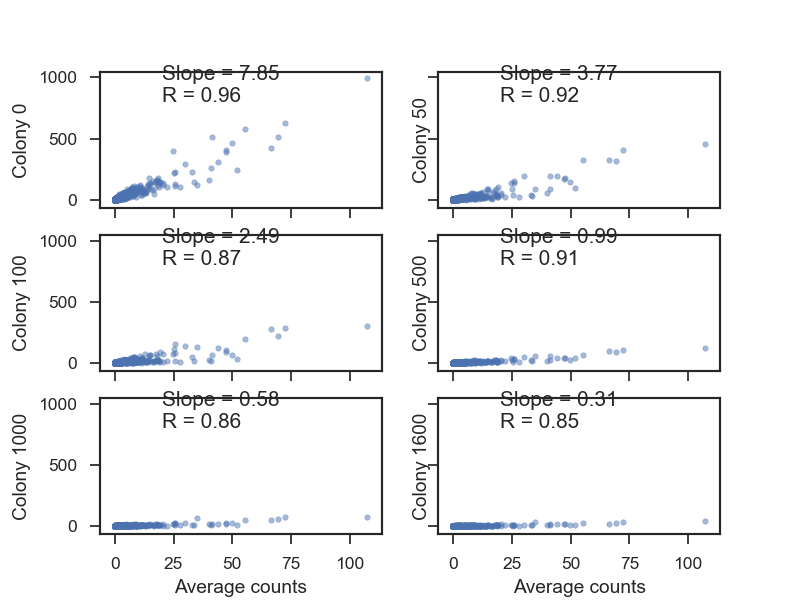

Column number 0 
 Slope = 7.85, Intercept = 0.229, rvalue = 0.957, p_value = 0.0, std_err = 0.029
Column number 50 
 Slope = 3.77, Intercept = -0.181, rvalue = 0.920, p_value = 0.0, std_err = 0.019
Column number 100 
 Slope = 2.49, Intercept = 0.019, rvalue = 0.869, p_value = 0.0, std_err = 0.017
Column number 500 
 Slope = 0.99, Intercept = -0.013, rvalue = 0.915, p_value = 0.0, std_err = 0.005
Column number 1000 
 Slope = 0.58, Intercept = 0.007, rvalue = 0.855, p_value = 0.0, std_err = 0.004
Column number 1600 
 Slope = 0.31, Intercept = -0.013, rvalue = 0.852, p_value = 0.0, std_err = 0.002


In [36]:
fig, axarr = plt.subplots(3,2, sharex = True, sharey = True)

columndata_x =  np.array(ARO4_lib_data_mincount_genes.sum(axis=1)/len(ARO4_lib_data_mincount_genes.columns))
for jj, ncol in enumerate([0,50,100,500,1000,1600]):
    ax = axarr.flatten()[jj]
    column_y = ARO4_lib_data_mincount_genes.columns[ncol]
    columndata_y = ARO4_lib_data_mincount_genes[column_y]
    ax.scatter(columndata_x, columndata_y, s = 10, alpha=0.5)
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
    ax.set_ylabel("Colony " + str(ncol))
    ax.text(20,800, "Slope = {:.2f}\nR = {:.2f}".format(slope, r_value))
    if jj in [4,5]:
        ax.set_xlabel("Average counts")
    print("Column number {} \n Slope = {:.2f}, Intercept = {:.3f}, rvalue = {:.3f}, p_value = {}, std_err = {:.3f}".format(ncol, slope, intercept, r_value, p_value, std_err))

#plt.savefig(os.path.normpath(base_dir + os.sep + "analysis" + os.sep + "20180730_counts_v_avg.svg" ))

<IPython.core.display.Javascript object>


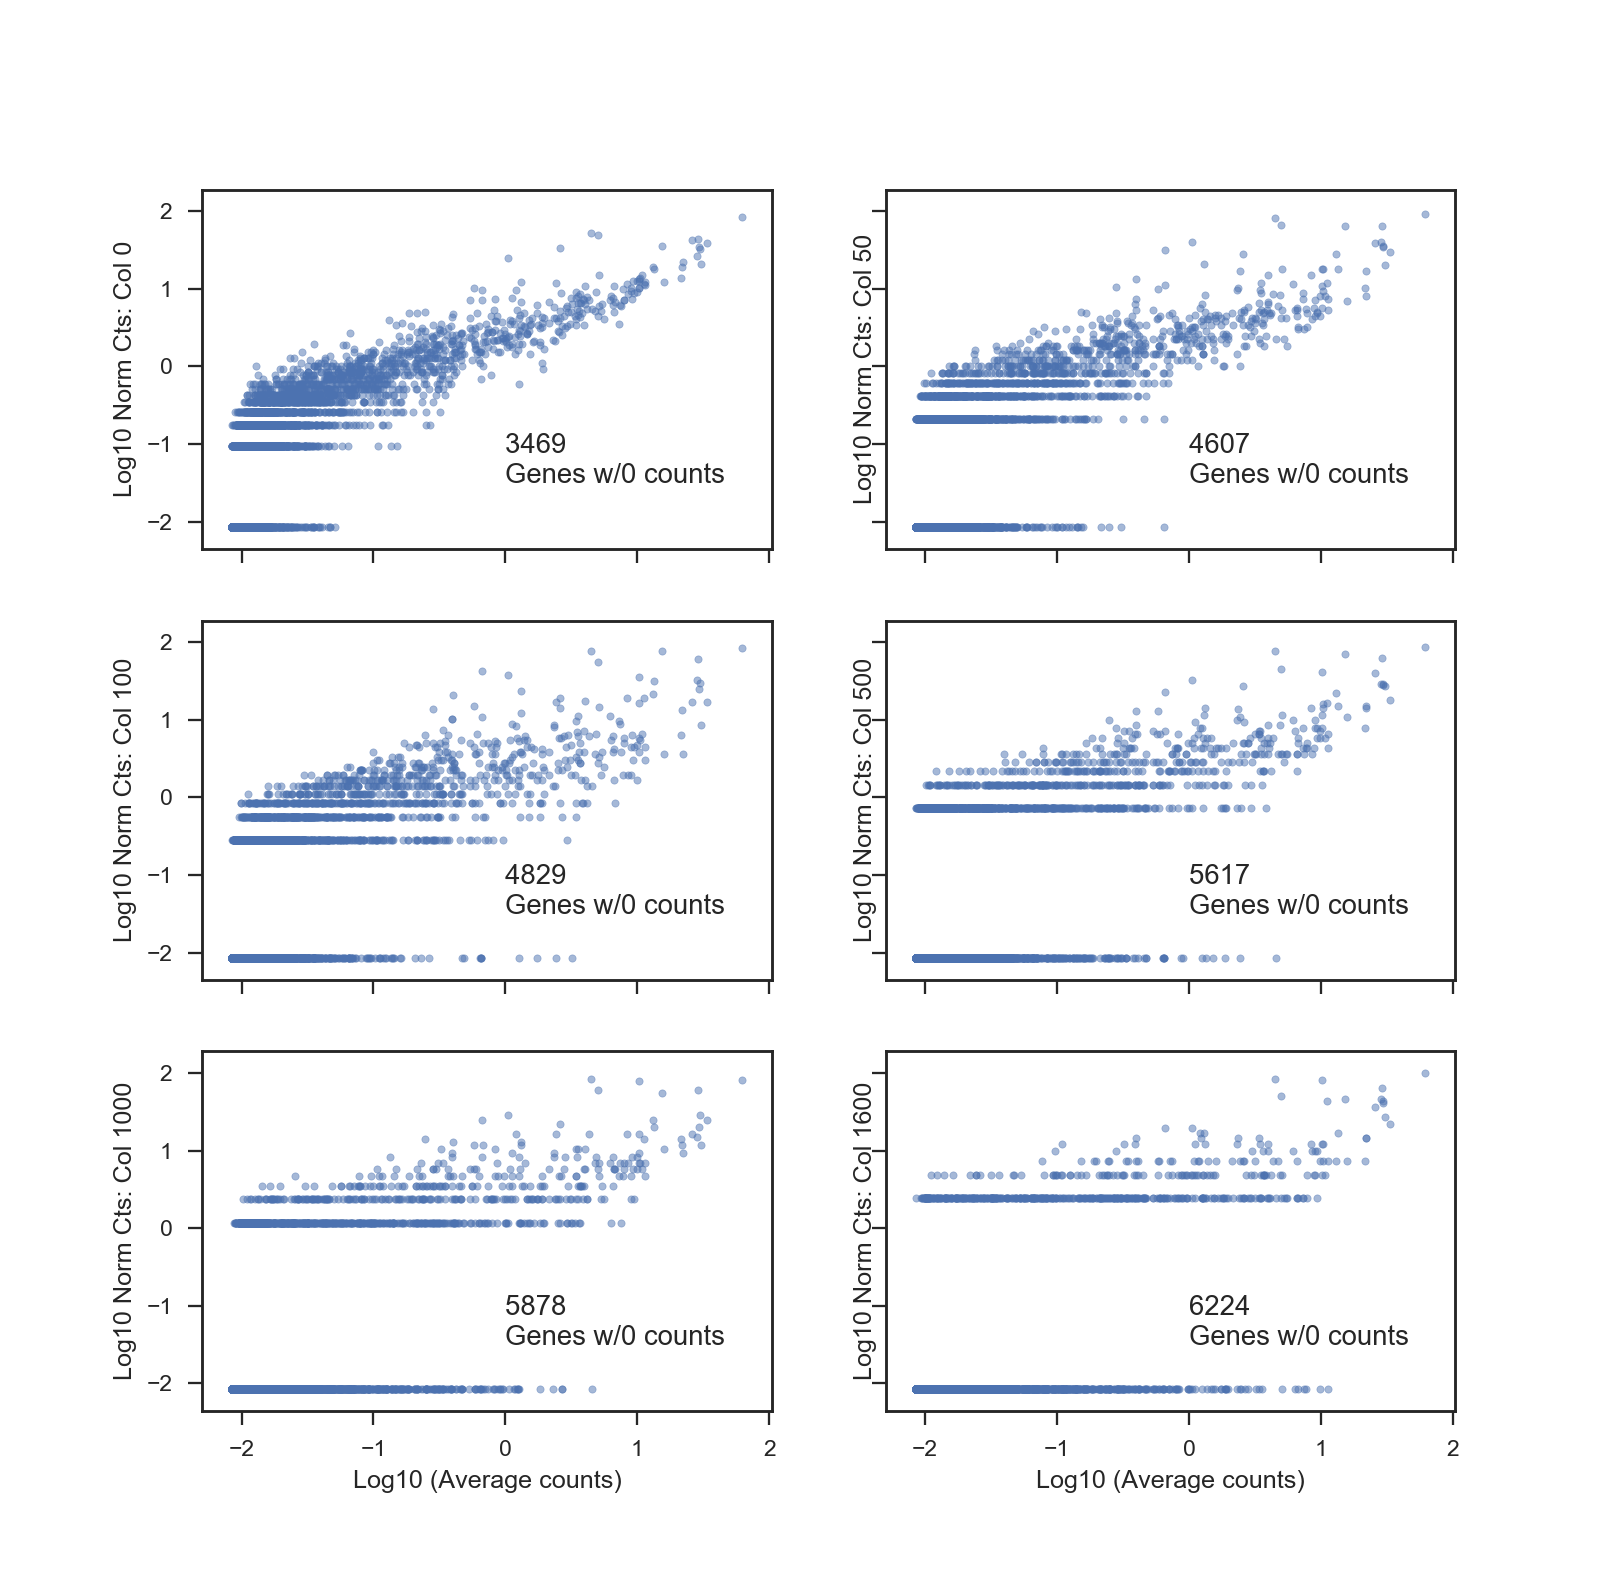

In [60]:
fig, axarr = plt.subplots(3,2, sharex = True, sharey = True)

columndata_x =  np.array(ARO4_lib_data_mincount_genes_norm_log10.sum(axis=1)/len(ARO4_lib_data_mincount_genes_norm_log10.columns))
for jj, ncol in enumerate([0,50,100,500,1000,1600]):
    ax = axarr.flatten()[jj]
    column_y = ARO4_lib_data_mincount_genes_norm_log10.columns[ncol]
    columndata_y = ARO4_lib_data_mincount_genes_norm_log10[column_y]
    ax.scatter(columndata_x, columndata_y, s = 10, alpha=0.5)
    #slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
    Nzeros = sum(ARO4_lib_data_mincount_genes.iloc[:,ncol] ==0)
    ax.set_ylabel("Log10 Norm Cts: Col " + str(ncol))
    ax.text(0,-1.5, "{} \nGenes w/0 counts".format(Nzeros))
    if jj in [4,5]:
        ax.set_xlabel("Log10 (Average counts)")
    #print("Column number {} \n Slope = {:.2f}, Intercept = {:.3f}, rvalue = {:.3f}, p_value = {}, std_err = {:.3f}".format(ncol, slope, intercept, r_value, p_value, std_err))


<IPython.core.display.Javascript object>


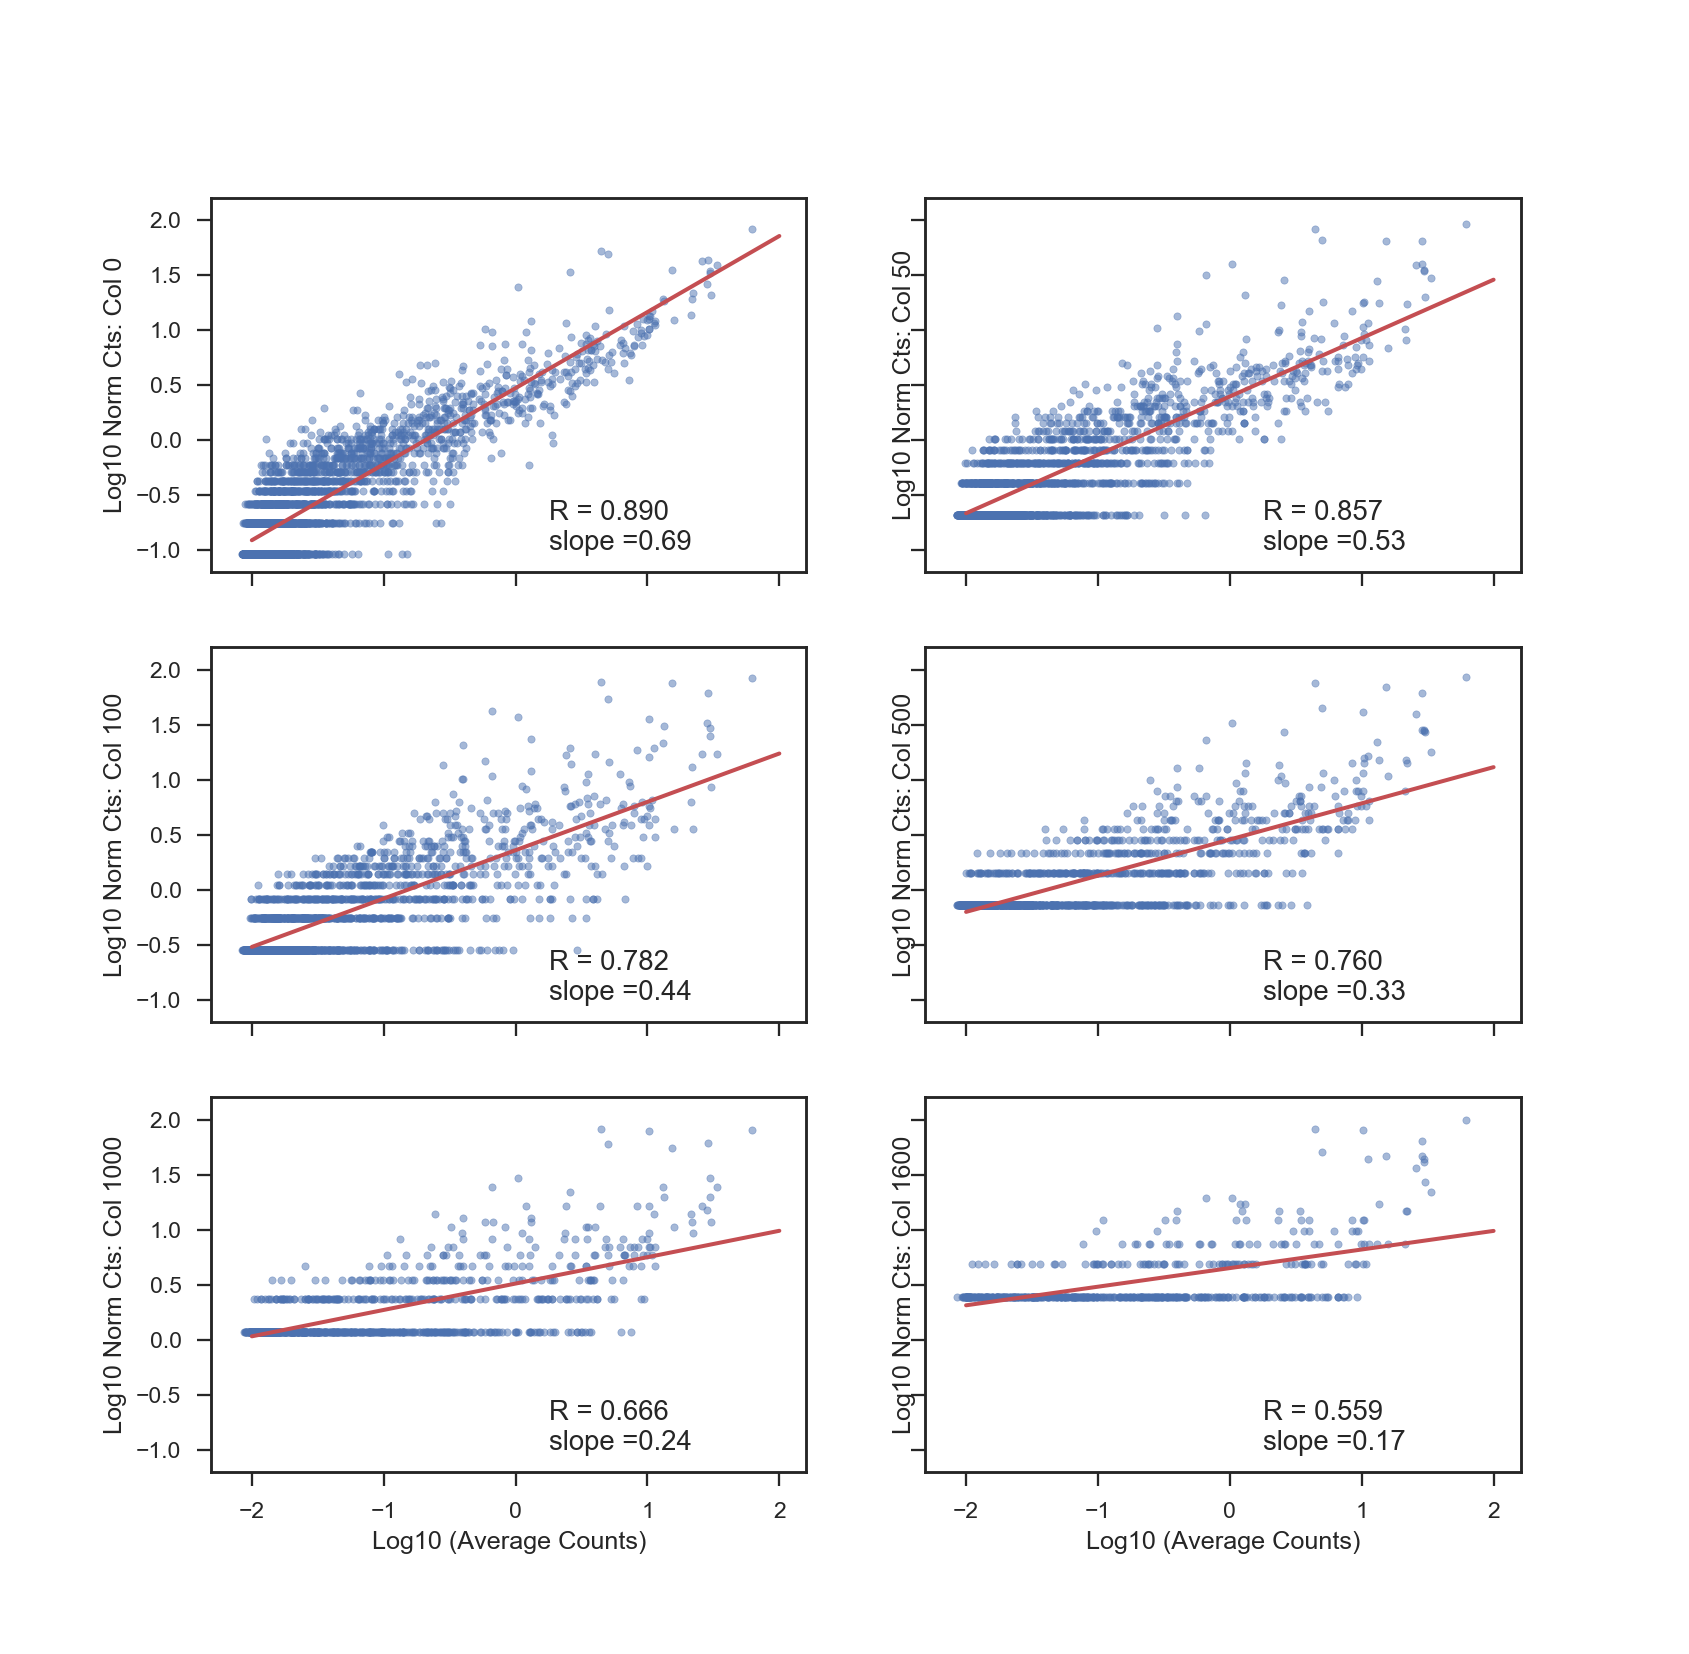

In [59]:
#Filter out 0 genes, plot scatter, superimpose best fit line
fig, axarr = plt.subplots(3,2, sharex = True, sharey = True)

zero_thresh_logspace = -2.0  #the threshold for zero counts in log space based on the pseudocount

columndata_x =  np.array(ARO4_lib_data_mincount_genes_norm_log10.sum(axis=1)/len(ARO4_lib_data_mincount_genes_norm_log10.columns))
for jj, ncol in enumerate([0,50,100,500,1000,1600]):
    ax = axarr.flatten()[jj]
    column_y = ARO4_lib_data_mincount_genes_norm_log10.columns[ncol]
    columndata_y = ARO4_lib_data_mincount_genes_norm_log10[column_y]
    nozero_filter = columndata_y>zero_thresh_logspace
    columndata_x_nozeros = columndata_x[nozero_filter]
    columndata_y_nozeros = columndata_y[nozero_filter]
    ax.scatter(columndata_x_nozeros, columndata_y_nozeros, s = 10, alpha=0.5)
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x_nozeros,columndata_y_nozeros)
    line_xvals = np.linspace(-2.0,2.0, num=4)
    line_yvals = intercept + slope*line_xvals
    ax.plot(line_xvals, line_yvals, 'r')
    ax.set_ylabel("Log10 Norm Cts: Col " + str(ncol))
    ax.text(0.25,-1, "R = {:.3f}\nslope ={:.2f}".format(r_value, slope))
    if jj in [4,5]:
        ax.set_xlabel("Log10 (Average Counts)")
    #print("Column number {} \n Slope = {:.2f}, Intercept = {:.3f}, rvalue = {:.3f}, p_value = {}, std_err = {:.3f}".format(ncol, slope, intercept, r_value, p_value, std_err))



<IPython.core.display.Javascript object>


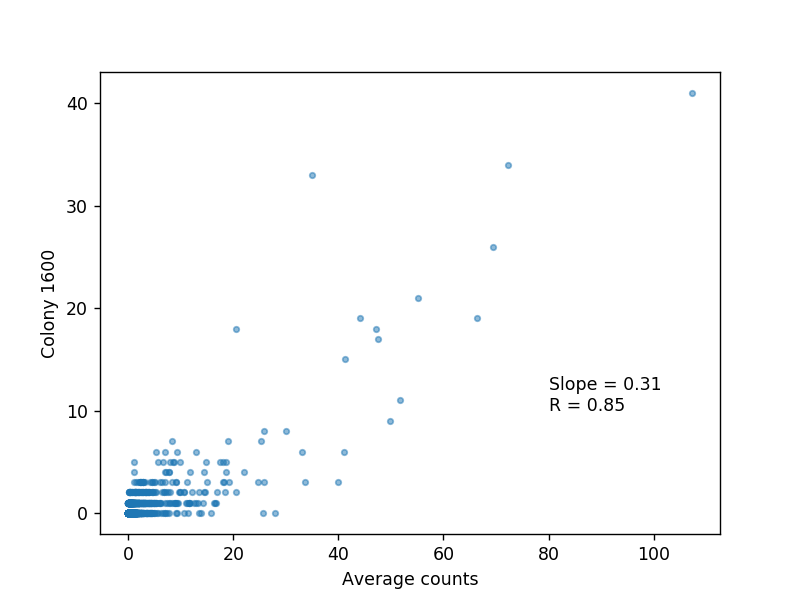

Column number 1600 
 Slope = 0.31, Intercept = -0.013, rvalue = 0.852, p_value = 0.0, std_err = 0.002


In [452]:
#Look closely at number 1600
fig, ax = plt.subplots()

ARO4_lib_data_mincount_genes = ARO4_lib_data_mincount.drop('total_counts')


columndata_x =  ARO4_lib_data_mincount_genes.sum(axis=1)/len(ARO4_lib_data_mincount_genes.columns)
ncol = 1600
column_y = ARO4_lib_data_mincount_genes.columns[ncol]
columndata_y = ARO4_lib_data_mincount_genes[column_y]
ax.scatter(columndata_x, columndata_y, s = 10, alpha=0.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
ax.set_ylabel("Colony " + str(ncol))
ax.text(80,10, "Slope = {:.2f}\nR = {:.2f}".format(slope, r_value))
ax.set_xlabel("Average counts")
print("Column number {} \n Slope = {:.2f}, Intercept = {:.3f}, rvalue = {:.3f}, p_value = {}, std_err = {:.3f}".format(ncol, slope, intercept, r_value, p_value, std_err))


<IPython.core.display.Javascript object>


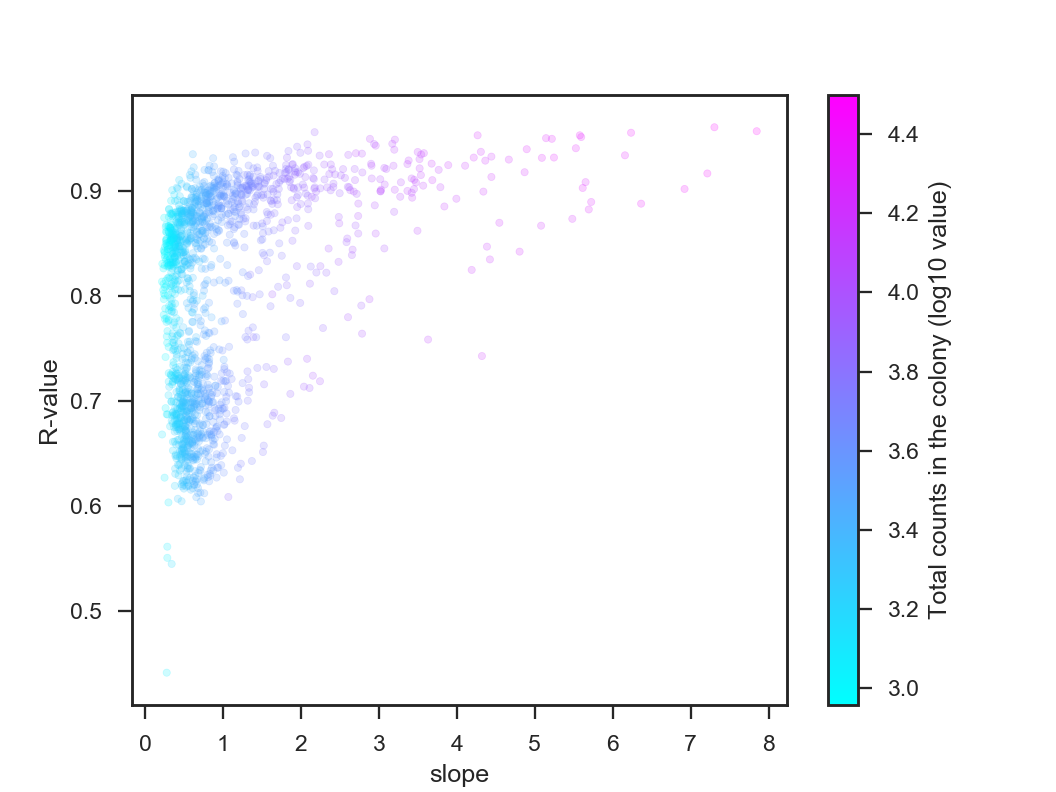

In [62]:
#Plot all R values against one another.

columndata_x =  ARO4_lib_data_mincount_genes.sum(axis=1)/len(ARO4_lib_data_mincount_genes.columns)

fig, ax = plt.subplots()

r_values = []
slopes = []
intercepts = []
for col in ARO4_lib_data_mincount_genes.columns: 
    columndata_y = ARO4_lib_data_mincount_genes[col]
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
    r_values.append(r_value)
    slopes.append(slope)
    intercepts.append(intercept)

colordata = np.log10(ARO4_lib_data_mincount.loc['total_counts',:])
#colordata = ARO4_lib_data_mincount.loc['total_counts',:]

ax.scatter(slopes, r_values, c=colordata, cmap = "cool", alpha = 0.2, s = 10)
ax.set_xlabel("slope")
ax.set_ylabel("R-value")


normalize = mpl_colors.Normalize(vmin=min(colordata), vmax=max(colordata))
#normalize = mpl_colors.LogNorm(vmin=min(colordata), vmax=max(colordata))

#ax1.set_xlim([-0.001, 0.0055])
# ax2 = axarr[0,1]
# ax2.scatter(intercepts, r_values, c = colordata, alpha = 0.2, s = 10)
# ax2.set_xlim([-0.08, 0.08])

cax, _ = mpl_colorbar.make_axes(ax)
cbar = mpl_colorbar.ColorbarBase(cax,cmap = 'cool', norm = normalize)
cbar.set_label("Total counts in the colony (log10 value)")


Here it seems that in general the higher the slope, the higher the R value when compared to average expression.   I worry that for the lower slopes, that much of the correlation is due to a high number of 0-count genes at the low end.  

<IPython.core.display.Javascript object>


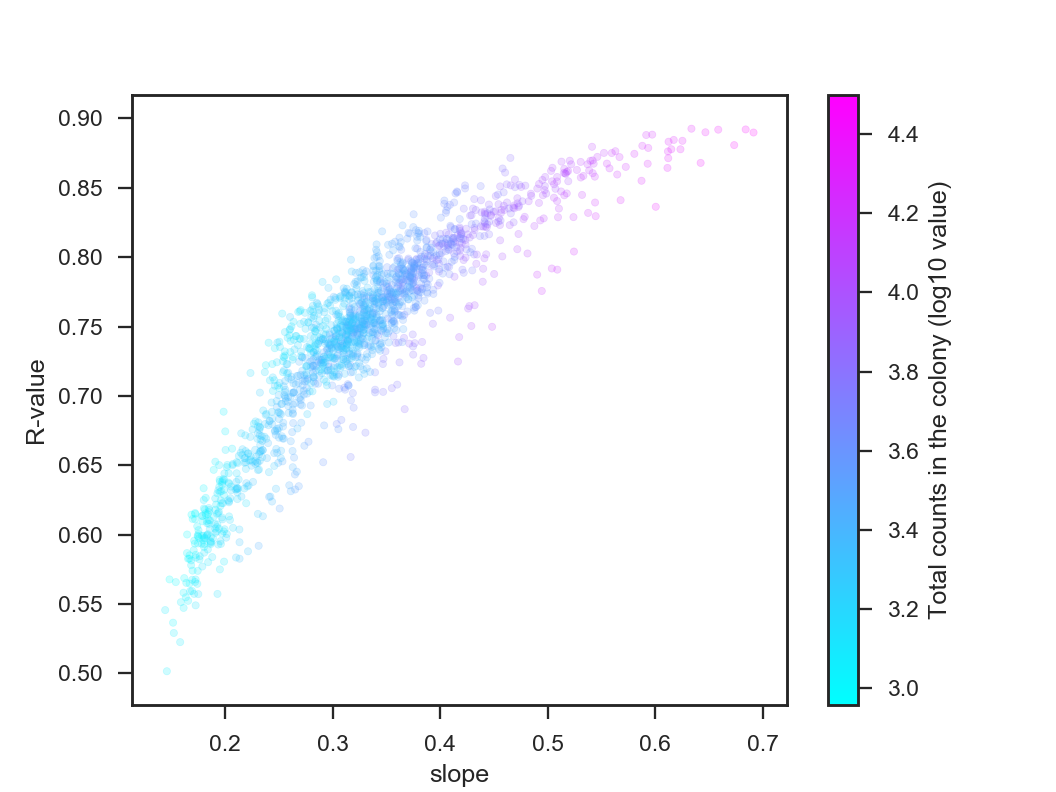

In [63]:
#Plot all R values against one another. Log Normalized data

columndata_x =  np.array(ARO4_lib_data_mincount_genes_norm_log10.sum(axis=1)/len(ARO4_lib_data_mincount_genes_norm_log10.columns))



fig, ax = plt.subplots()

r_values = []
slopes = []
intercepts = []
for col in ARO4_lib_data_mincount_genes_norm_log10.columns: 
    columndata_y = ARO4_lib_data_mincount_genes_norm_log10[col]
    nozero_filter = columndata_y>zero_thresh_logspace
    columndata_x_nozeros = columndata_x[nozero_filter]
    columndata_y_nozeros = columndata_y[nozero_filter]
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x_nozeros,columndata_y_nozeros)
    r_values.append(r_value)
    slopes.append(slope)
    intercepts.append(intercept)

colordata = np.log10(ARO4_lib_data_mincount.loc['total_counts',:])
#colordata = ARO4_lib_data_mincount.loc['total_counts',:]

ax.scatter(slopes, r_values, c=colordata, cmap = "cool", alpha = 0.2, s = 10)
ax.set_xlabel("slope")
ax.set_ylabel("R-value")


normalize = mpl_colors.Normalize(vmin=min(colordata), vmax=max(colordata))
#normalize = mpl_colors.LogNorm(vmin=min(colordata), vmax=max(colordata))

#ax1.set_xlim([-0.001, 0.0055])
# ax2 = axarr[0,1]
# ax2.scatter(intercepts, r_values, c = colordata, alpha = 0.2, s = 10)
# ax2.set_xlim([-0.08, 0.08])

cax, _ = mpl_colorbar.make_axes(ax)
cbar = mpl_colorbar.ColorbarBase(cax,cmap = 'cool', norm = normalize)
cbar.set_label("Total counts in the colony (log10 value)")


Here we see a clear relationship between R value (and slope) with the total count for the colony.  It seems that in the lower count colonies, the number of gene with small discrete counts is bringing the correlation with the average count data down.  


In [4]:
#Threshold for picking the most highly expressed genes: 
# 1) Genes that have at least N=3 counts in one of the smallest M=300 colonies (as determined by total number of reads)

M = 300
lowcount_thresh = 3
ARO4_high_exp_genes = ARO4_lib_data_mincount_genes[ARO4_lib_data_mincount_genes.iloc[:, -M:].max(axis = 1)>=lowcount_thresh]


<IPython.core.display.Javascript object>


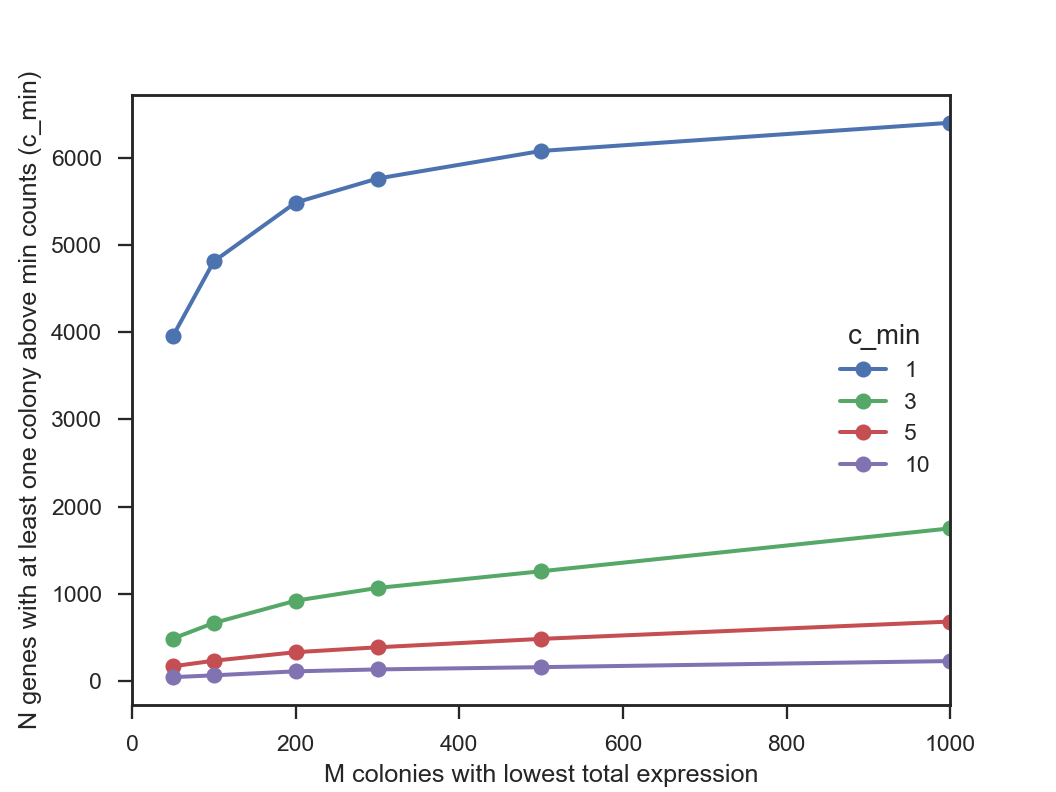

In [66]:
#Get a sense of how many genes we keep as we vary M and the lowcount threshold.  

fig, ax = plt.subplots()

M_vals = [50, 100, 200, 300, 500, 1000]
lowcount_threshs = [1,3,5,10]

N_genes_by_thresh = {}
for lowcount_thresh in lowcount_threshs: 
    N_genes_by_M = []
    for M in M_vals: 
        N_genes_by_M.append(sum(ARO4_lib_data_mincount_genes.iloc[:, -M:].max(axis = 1)>=lowcount_thresh))
    N_genes_by_thresh[lowcount_thresh] = N_genes_by_M

N_genes_by_thresh_df = pd.DataFrame(N_genes_by_thresh, index = M_vals)
N_genes_by_thresh_df.plot(marker = 'o', ax = ax)
ax.set_xlim(0,1000)
ax.set_xlabel("M colonies with lowest total expression")
ax.set_ylabel("N genes with at least one colony above min counts (c_min)")
ax.legend(title = "c_min")

plt.savefig(os.path.normpath(base_dir + os.sep + "analysis" + os.sep + "20180730_lowcount_thresh.svg" ))
        

In [5]:
#Normalize by total counts 
ARO4_high_exp_genes_norm = ARO4_high_exp_genes.copy()
ARO4_high_exp_genes_sum = ARO4_high_exp_genes.sum()
med = ARO4_high_exp_genes_sum.median()
for col in ARO4_high_exp_genes.columns:
    ARO4_high_exp_genes_norm[col] = ARO4_high_exp_genes[col]/ARO4_high_exp_genes_sum[col]*med

#sort genes by summed expression
ARO4_high_exp_genes_norm['gene_totals'] = ARO4_high_exp_genes_norm.sum(axis=1)
ARO4_high_exp_genes_norm.sort_values('gene_totals',ascending=False, inplace=True)
ARO4_high_exp_genes_norm.drop('gene_totals',axis=1, inplace = True)

pseudocount = 0.1/ARO4_high_exp_genes_sum[0]*med   #I am using 0.1 times 1/the largest number of counts for a pseudocount (multiplied by the median number of counts so all is on the same scale) - thus the pseudocount is 0.1 * the smallest possible value for a single read. 
ARO4_high_exp_genes_norm = ARO4_high_exp_genes_norm + pseudocount
ARO4_high_exp_genes_norm_log10 = np.log10(ARO4_high_exp_genes_norm)
ARO4_high_exp_genes_norm_log10




AGGTTAGACG  CTGTCATTGT  CTTGTGTCAG  CAGGCCTTCC  TAATTCGCCT  \
GENE                                                                    
HOR7         1.946120    1.902761    1.918193    1.933503    1.853466   
STF2         1.658892    1.677015    1.790003    1.803398    1.728322   
RPL41A       1.339802    1.412265    1.059812    1.250404    1.235857   
TMA10        1.745334    1.774937    1.914581    1.861832    1.763560   
HSP12        1.571008    1.642188    1.751781    1.759560    1.559810   
RPS31        1.615302    1.650476    1.458292    1.342622    1.679076   
RPL29        1.363830    1.410684    1.085029    1.079527    1.300380   
RPL23B       1.161144    1.233080    1.098807    0.909267    1.285746   
CUP1-2       1.539866    1.452926    1.353189    1.450572    1.601313   
CUP1-1       1.559457    1.410684    1.341714    1.455405    1.616632   
YNR034W-A    1.712193    1.707659    1.814171    1.863087    1.736305   
TRX2         1.440192    1.454361    1.552499    1.490773    1.475606   
RPS30A       1.113340    1.143322    0.836950    0.801062    1.121980   
RPL41B       1.655493    1.659504    1.364369    1.576286    1.521190   
RPL24A       1.306815    1.140380    1.192934    1.056064    1.283258   
21S_rRNA     1.035406    0.897551    1.497917    1.756368    1.392912   
RPS10A       0.974405    1.014549    0.645376    0.579620    0.929453   
RPL26B       1.066293    1.059480    0.830709    0.635978    1.118349   
RPS17A       0.966141    0.981786    0.654903    0.646422    1.006676   
YBR085C-A    1.283345    1.163380    1.309542    1.312523    1.362821   
YFR032C-B    1.028233    1.014549    0.716308    0.704305    0.987388   
YDR034W-B    1.415706    1.311428    1.472862    1.597586    1.275708   
PMP3         1.308715    1.284737    1.351297    1.364890    1.156720   
RPL34B       1.110357    1.002551    0.910842    0.808231    1.006676   
RPL43B       0.957716    0.937017    0.755396    0.603048    1.072218   
RPL38        1.035406    1.026225    0.950764    0.763329    1.136211   
SPG4         1.002153    1.122293    1.403062    1.408058    0.918035   
RPS23A       0.630835    0.663817    0.469721    0.346262    0.715349   
RGI1         1.549772    1.418534    1.531733    1.440742    1.558488   
RPS12        1.199354    1.225866    1.025078    0.685855    1.143156   
...               ...         ...         ...         ...         ...   
MET16       -1.009917   -0.987960   -0.688427   -0.942506   -0.639310   
ECM38       -0.559948   -0.320107   -2.051310   -0.658716   -2.051310   
ECM30       -2.051310   -0.987960   -2.051310   -0.658716   -2.051310   
NOT3        -2.051310   -2.051310   -0.688427   -2.051310   -0.923839   
YOR262W     -2.051310   -0.706115   -2.051310   -2.051310   -2.051310   
URB1        -2.051310   -2.051310   -0.971022   -0.942506   -0.923839   
RAD14       -1.009917   -2.051310   -0.518659   -0.942506   -0.923839   
SHE9        -0.729091   -0.706115   -2.051310   -0.488527   -0.639310   
YSC84       -2.051310   -0.987960   -0.518659   -0.658716   -0.639310   
GCD2        -2.051310   -2.051310   -0.971022   -0.942506   -0.468861   
GPI10       -0.729091   -0.415005   -0.971022   -0.488527   -2.051310   
RRG1        -1.009917   -0.987960   -2.051310   -0.942506   -0.923839   
MTC4        -0.559948   -0.415005   -2.051310   -0.488527   -0.639310   
YAP6        -0.729091   -2.051310   -2.051310   -2.051310   -0.923839   
BIR1        -2.051310   -0.706115   -2.051310   -0.658716   -2.051310   
GUT2        -2.051310   -0.987960   -2.051310   -0.942506   -2.051310   
MAK5        -2.051310   -2.051310   -2.051310   -0.658716   -2.051310   
YPL216W     -1.009917   -2.051310   -2.051310   -2.051310   -2.051310   
NPA3        -2.051310   -0.987960   -0.688427   -2.051310   -0.923839   
NSR1        -0.729091   -2.051310   -0.971022   -2.051310   -0.923839   
PRP28       -2.051310   -2.051310   -2.051310   -0.942506   -2.051310   
YHL044W     -1.009917   -2.051310   -0.971022   -2.051310   -2.051310

<IPython.core.display.Javascript object>


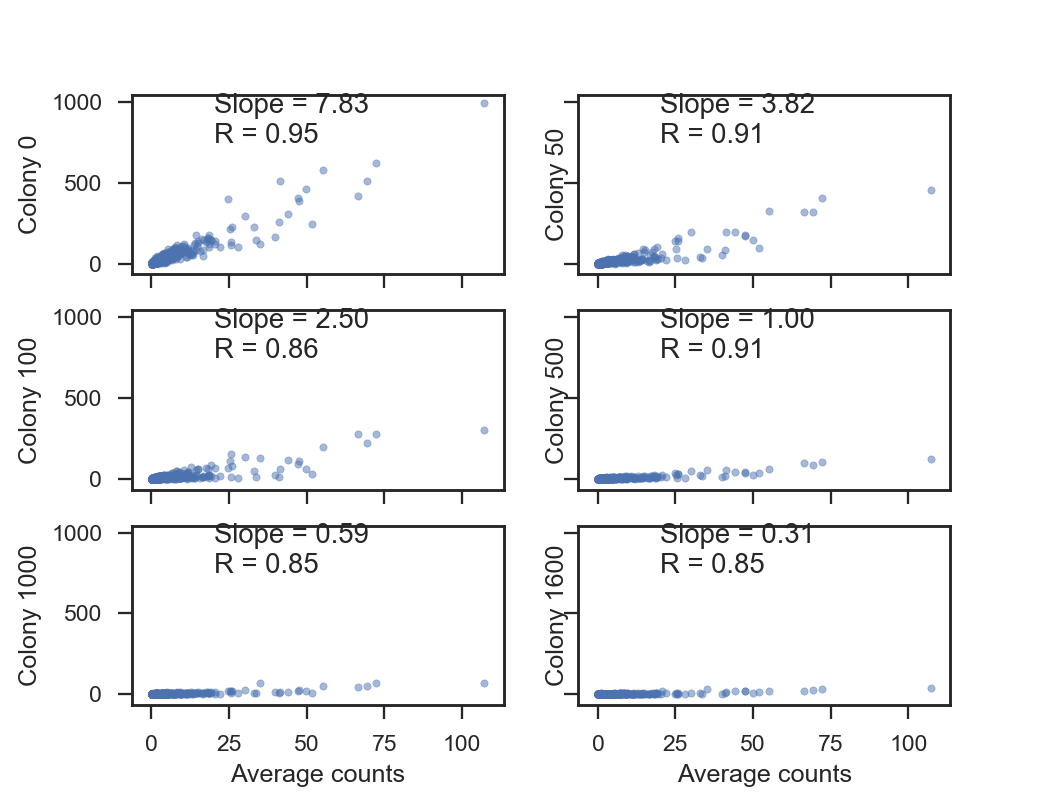

Column number 0 
 Slope = 7.83, Intercept = 0.556, rvalue = 0.952, p_value = 0.0, std_err = 0.077
Column number 50 
 Slope = 3.82, Intercept = -1.309, rvalue = 0.914, p_value = 0.0, std_err = 0.052
Column number 100 
 Slope = 2.50, Intercept = -0.186, rvalue = 0.857, p_value = 1.2628099873682863e-308, std_err = 0.046
Column number 500 
 Slope = 1.00, Intercept = -0.121, rvalue = 0.909, p_value = 0.0, std_err = 0.014
Column number 1000 
 Slope = 0.59, Intercept = -0.065, rvalue = 0.848, p_value = 8.676107212327971e-295, std_err = 0.011
Column number 1600 
 Slope = 0.31, Intercept = -0.081, rvalue = 0.846, p_value = 7.414958958733154e-293, std_err = 0.006


In [68]:
fig, axarr = plt.subplots(3,2, sharex = True, sharey = True)

columndata_x =  ARO4_high_exp_genes.sum(axis=1)/len(ARO4_high_exp_genes.columns)
for jj, ncol in enumerate([0,50,100,500,1000,1600]):
    ax = axarr.flatten()[jj]
    column_y = ARO4_high_exp_genes.columns[ncol]
    columndata_y = ARO4_high_exp_genes[column_y]
    ax.scatter(columndata_x, columndata_y, s = 10, alpha=0.5)
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
    print("Column number {} \n Slope = {:.2f}, Intercept = {:.3f}, rvalue = {:.3f}, p_value = {}, std_err = {:.3f}".format(ncol, slope, intercept, r_value, p_value, std_err))
    ax.set_ylabel("Colony " + str(ncol))
    ax.text(20,750, "Slope = {:.2f}\nR = {:.2f}".format(slope, r_value))
    if jj in [4,5]:
        ax.set_xlabel("Average counts")

In [69]:
ARO4_high_exp_genes_norm_log10

AGGTTAGACG  CTGTCATTGT  CTTGTGTCAG  CAGGCCTTCC  TAATTCGCCT  \
GENE                                                                    
HOR7         1.946120    1.902761    1.918193    1.933503    1.853466   
STF2         1.658892    1.677015    1.790003    1.803398    1.728322   
RPL41A       1.339802    1.412265    1.059812    1.250404    1.235857   
TMA10        1.745334    1.774937    1.914581    1.861832    1.763560   
HSP12        1.571008    1.642188    1.751781    1.759560    1.559810   
RPS31        1.615302    1.650476    1.458292    1.342622    1.679076   
RPL29        1.363830    1.410684    1.085029    1.079527    1.300380   
RPL23B       1.161144    1.233080    1.098807    0.909267    1.285746   
CUP1-2       1.539866    1.452926    1.353189    1.450572    1.601313   
CUP1-1       1.559457    1.410684    1.341714    1.455405    1.616632   
YNR034W-A    1.712193    1.707659    1.814171    1.863087    1.736305   
TRX2         1.440192    1.454361    1.552499    1.490773    1.475606   
RPS30A       1.113340    1.143322    0.836950    0.801062    1.121980   
RPL41B       1.655493    1.659504    1.364369    1.576286    1.521190   
RPL24A       1.306815    1.140380    1.192934    1.056064    1.283258   
21S_rRNA     1.035406    0.897551    1.497917    1.756368    1.392912   
RPS10A       0.974405    1.014549    0.645376    0.579620    0.929453   
RPL26B       1.066293    1.059480    0.830709    0.635978    1.118349   
RPS17A       0.966141    0.981786    0.654903    0.646422    1.006676   
YBR085C-A    1.283345    1.163380    1.309542    1.312523    1.362821   
YFR032C-B    1.028233    1.014549    0.716308    0.704305    0.987388   
YDR034W-B    1.415706    1.311428    1.472862    1.597586    1.275708   
PMP3         1.308715    1.284737    1.351297    1.364890    1.156720   
RPL34B       1.110357    1.002551    0.910842    0.808231    1.006676   
RPL43B       0.957716    0.937017    0.755396    0.603048    1.072218   
RPL38        1.035406    1.026225    0.950764    0.763329    1.136211   
SPG4         1.002153    1.122293    1.403062    1.408058    0.918035   
RPS23A       0.630835    0.663817    0.469721    0.346262    0.715349   
RGI1         1.549772    1.418534    1.531733    1.440742    1.558488   
RPS12        1.199354    1.225866    1.025078    0.685855    1.143156   
...               ...         ...         ...         ...         ...   
MET16       -1.009917   -0.987960   -0.688427   -0.942506   -0.639310   
ECM38       -0.559948   -0.320107   -2.051310   -0.658716   -2.051310   
ECM30       -2.051310   -0.987960   -2.051310   -0.658716   -2.051310   
NOT3        -2.051310   -2.051310   -0.688427   -2.051310   -0.923839   
YOR262W     -2.051310   -0.706115   -2.051310   -2.051310   -2.051310   
URB1        -2.051310   -2.051310   -0.971022   -0.942506   -0.923839   
RAD14       -1.009917   -2.051310   -0.518659   -0.942506   -0.923839   
SHE9        -0.729091   -0.706115   -2.051310   -0.488527   -0.639310   
YSC84       -2.051310   -0.987960   -0.518659   -0.658716   -0.639310   
GCD2        -2.051310   -2.051310   -0.971022   -0.942506   -0.468861   
GPI10       -0.729091   -0.415005   -0.971022   -0.488527   -2.051310   
RRG1        -1.009917   -0.987960   -2.051310   -0.942506   -0.923839   
MTC4        -0.559948   -0.415005   -2.051310   -0.488527   -0.639310   
YAP6        -0.729091   -2.051310   -2.051310   -2.051310   -0.923839   
BIR1        -2.051310   -0.706115   -2.051310   -0.658716   -2.051310   
GUT2        -2.051310   -0.987960   -2.051310   -0.942506   -2.051310   
MAK5        -2.051310   -2.051310   -2.051310   -0.658716   -2.051310   
YPL216W     -1.009917   -2.051310   -2.051310   -2.051310   -2.051310   
NPA3        -2.051310   -0.987960   -0.688427   -2.051310   -0.923839   
NSR1        -0.729091   -2.051310   -0.971022   -2.051310   -0.923839   
PRP28       -2.051310   -2.051310   -2.051310   -0.942506   -2.051310   
YHL044W     -1.009917   -2.051310   -0.971022   -2.051310   -2.051310

<IPython.core.display.Javascript object>


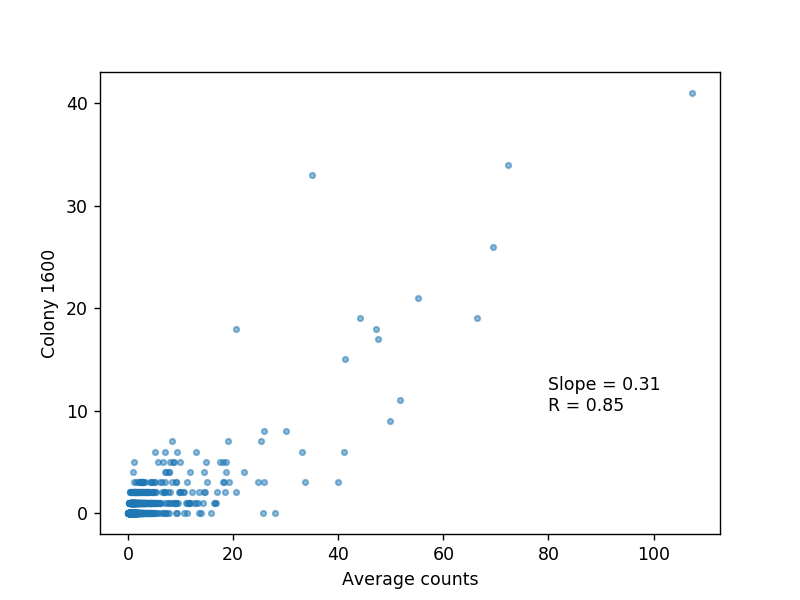

Column number 1600 
 Slope = 0.31, Intercept = -0.081, rvalue = 0.846, p_value = 7.414958958733154e-293, std_err = 0.006


In [459]:
#Look closely at number 1600
fig, ax = plt.subplots()




columndata_x =  ARO4_high_exp_genes.sum(axis=1)/len(ARO4_high_exp_genes.columns)
ncol = 1600
column_y = ARO4_high_exp_genes.columns[ncol]
columndata_y = ARO4_high_exp_genes[column_y]
ax.scatter(columndata_x, columndata_y, s = 10, alpha=0.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
ax.set_ylabel("Colony " + str(ncol))
ax.text(80,10, "Slope = {:.2f}\nR = {:.2f}".format(slope, r_value))
ax.set_xlabel("Average counts")
print("Column number {} \n Slope = {:.2f}, Intercept = {:.3f}, rvalue = {:.3f}, p_value = {}, std_err = {:.3f}".format(ncol, slope, intercept, r_value, p_value, std_err))


<IPython.core.display.Javascript object>


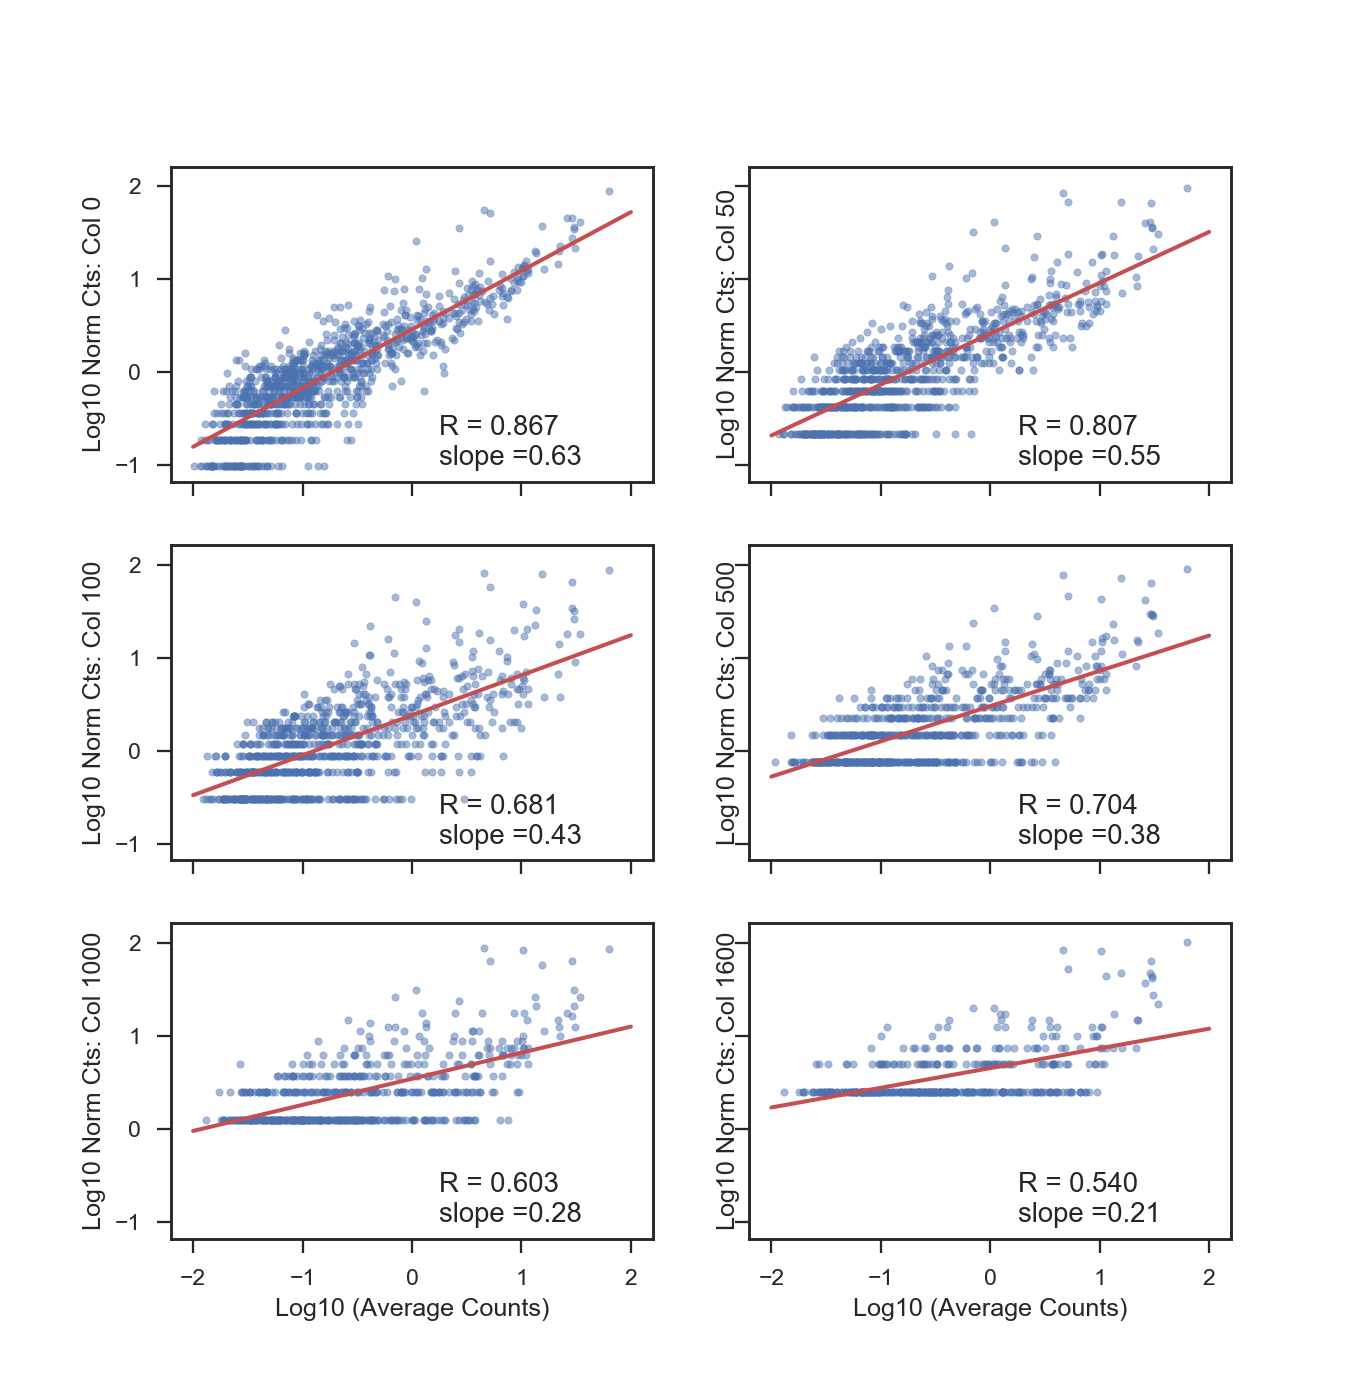

In [70]:
fig, axarr = plt.subplots(3,2, sharex = True, sharey = True)

zero_thresh_logspace = -2.0
columndata_x =  ARO4_high_exp_genes_norm_log10.sum(axis=1)/len(ARO4_high_exp_genes_norm_log10.columns)
for jj, ncol in enumerate([0,50,100,500,1000,1600]):
    ax = axarr.flatten()[jj]
    column_y = ARO4_high_exp_genes_norm_log10.columns[ncol]
    columndata_y = ARO4_high_exp_genes_norm_log10[column_y]
    nozero_filter = columndata_y>zero_thresh_logspace
    columndata_x_nozeros = columndata_x[nozero_filter]
    columndata_y_nozeros = columndata_y[nozero_filter]
    ax.scatter(columndata_x_nozeros, columndata_y_nozeros, s = 10, alpha=0.5)
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x_nozeros,columndata_y_nozeros)
    line_xvals = np.linspace(-2.0,2.0, num=4)
    line_yvals = intercept + slope*line_xvals
    ax.plot(line_xvals, line_yvals, 'r')
    ax.set_ylabel("Log10 Norm Cts: Col " + str(ncol))
    ax.text(0.25,-1, "R = {:.3f}\nslope ={:.2f}".format(r_value, slope))
    if jj in [4,5]:
        ax.set_xlabel("Log10 (Average Counts)")
        

<IPython.core.display.Javascript object>


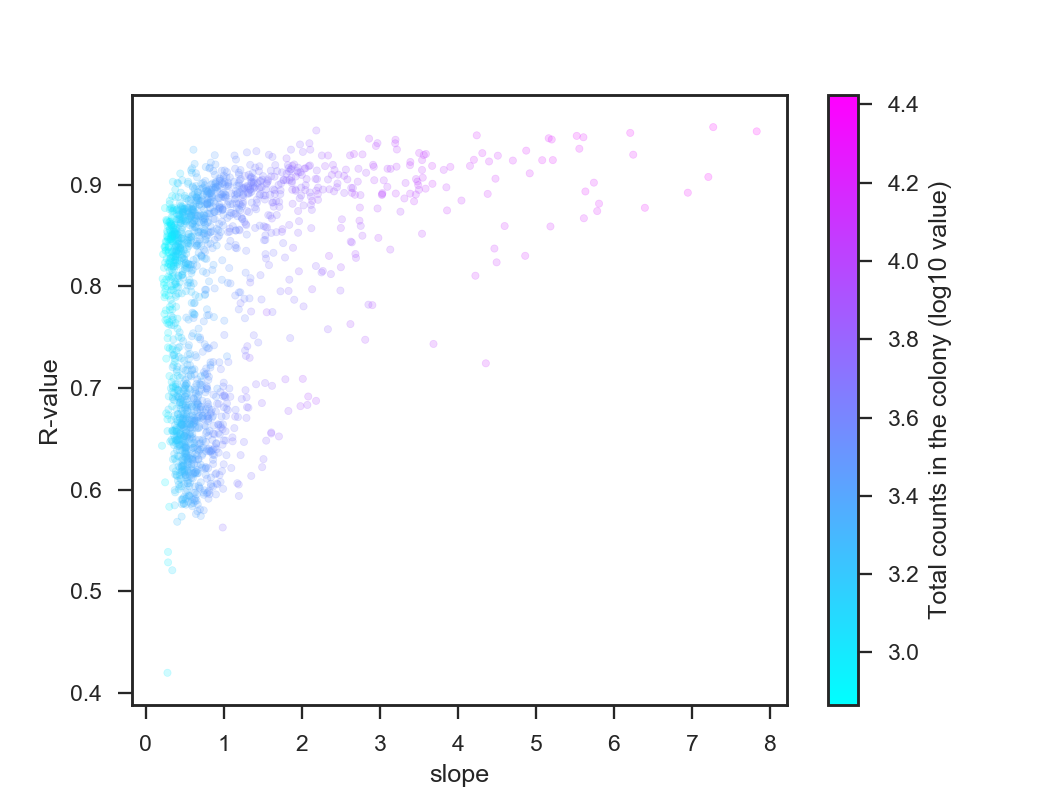

In [71]:
#Plot all R values against one another. 

columndata_x =  ARO4_high_exp_genes.sum(axis=1)/len(ARO4_high_exp_genes.columns)


fig, ax = plt.subplots()

r_values = []
slopes = []
intercepts = []
for col in ARO4_high_exp_genes.columns: 
    columndata_y = ARO4_high_exp_genes[col]
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
    r_values.append(r_value)
    slopes.append(slope)
    intercepts.append(intercept)

colordata = np.log10(ARO4_high_exp_genes.sum())
#colordata = ARO4_lib_data_mincount.loc['total_counts',:]

ax.scatter(slopes, r_values, c=colordata, cmap = "cool", alpha = 0.2, s = 10)
ax.set_xlabel("slope")
ax.set_ylabel("R-value")


normalize = mpl_colors.Normalize(vmin=min(colordata), vmax=max(colordata))
#normalize = mpl_colors.LogNorm(vmin=min(colordata), vmax=max(colordata))

#ax1.set_xlim([-0.001, 0.0055])
# ax2 = axarr[0,1]
# ax2.scatter(intercepts, r_values, c = colordata, alpha = 0.2, s = 10)
# ax2.set_xlim([-0.08, 0.08])

cax, _ = mpl_colorbar.make_axes(ax)
cbar = mpl_colorbar.ColorbarBase(cax,cmap = 'cool', norm = normalize)
cbar.set_label("Total counts in the colony (log10 value)")

<IPython.core.display.Javascript object>


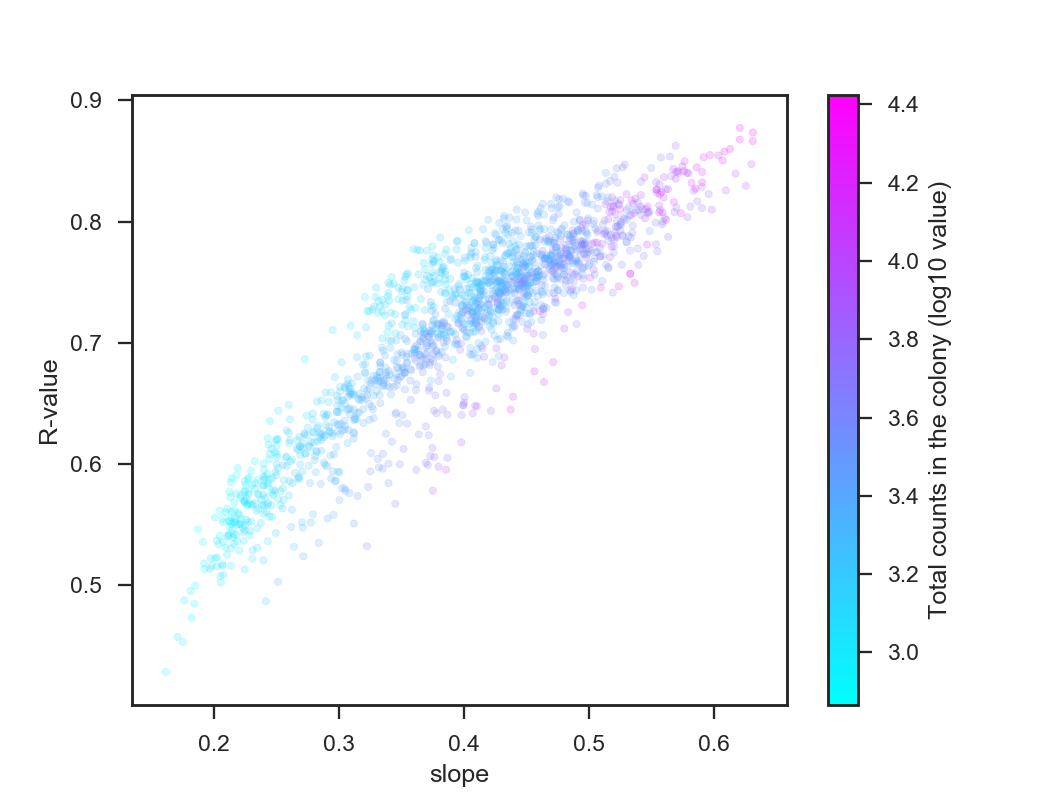

In [74]:
#Plot all R values against one another. 

columndata_x =  ARO4_high_exp_genes_norm_log10.sum(axis=1)/len(ARO4_high_exp_genes_norm_log10.columns)


# for col in ARO4_lib_data_mincount_genes_norm_log10.columns: 
#     columndata_y = ARO4_lib_data_mincount_genes_norm_log10[col]
#     nozero_filter = columndata_y>zero_thresh_logspace
#     columndata_x_nozeros = columndata_x[nozero_filter]
#     columndata_y_nozeros = columndata_y[nozero_filter]
#     slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x_nozeros,columndata_y_nozeros)



fig, ax = plt.subplots()

r_values = []
slopes = []
intercepts = []
for col in ARO4_high_exp_genes_norm_log10.columns: 
    columndata_y = ARO4_high_exp_genes_norm_log10[col]
    nozero_filter = columndata_y>zero_thresh_logspace
    columndata_x_nozeros = columndata_x[nozero_filter]
    columndata_y_nozeros = columndata_y[nozero_filter]
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x_nozeros,columndata_y_nozeros)
    r_values.append(r_value)
    slopes.append(slope)
    intercepts.append(intercept)

colordata = np.log10(ARO4_high_exp_genes.sum())
#colordata = ARO4_lib_data_mincount.loc['total_counts',:]

ax.scatter(slopes, r_values, c=colordata, cmap = "cool", alpha = 0.2, s = 10)
ax.set_xlabel("slope")
ax.set_ylabel("R-value")


normalize = mpl_colors.Normalize(vmin=min(colordata), vmax=max(colordata))
#normalize = mpl_colors.LogNorm(vmin=min(colordata), vmax=max(colordata))

#ax1.set_xlim([-0.001, 0.0055])
# ax2 = axarr[0,1]
# ax2.scatter(intercepts, r_values, c = colordata, alpha = 0.2, s = 10)
# ax2.set_xlim([-0.08, 0.08])

cax, _ = mpl_colorbar.make_axes(ax)
cbar = mpl_colorbar.ColorbarBase(cax,cmap = 'cool', norm = normalize)
cbar.set_label("Total counts in the colony (log10 value)")

In [170]:
moclo_genes = pd.Series(['TDH3','CCW12','PGK1','HHF2', 'TEF1', 'TEF2','HHF1','HTB2','RPL18B','ALD6','PAB1','RET2','RNR1','SAC6','RNR2','POP6','RAD27','PSP2','REV1'])

moclo_genes_above_thresh = moclo_genes[moclo_genes.isin((set(moclo_genes)&set(ARO4_high_exp_genes.index)))]

ARO4_moclo_genes = ARO4_high_exp_genes.loc[moclo_genes_above_thresh,:]

In [491]:
moclo_genes_above_thresh

0     TDH3
1    CCW12
2     PGK1
3     HHF2
4     TEF1
5     TEF2
6     HHF1
9     ALD6
dtype: object

<IPython.core.display.Javascript object>


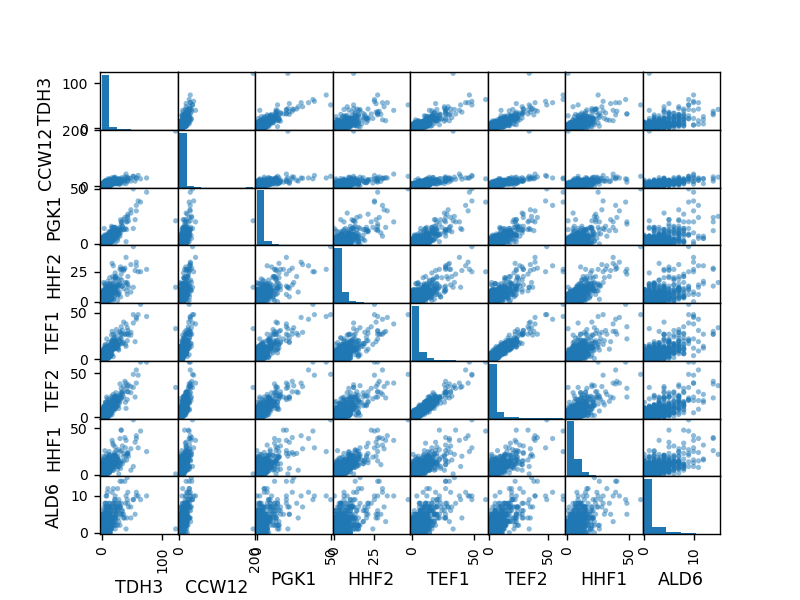

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BF10C3668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021BF2B09A90>]], dtype=object)

In [169]:
pd.plotting.scatter_matrix(ARO4_high_exp_genes.loc[moclo_genes_above_thresh,:].transpose())
#,'HHF1','ALD6','ARO4'

#plt.scatter(ARO4_lib_data.loc['CCW12',:], ARO4_lib_data.loc['TDH3',:])

<IPython.core.display.Javascript object>


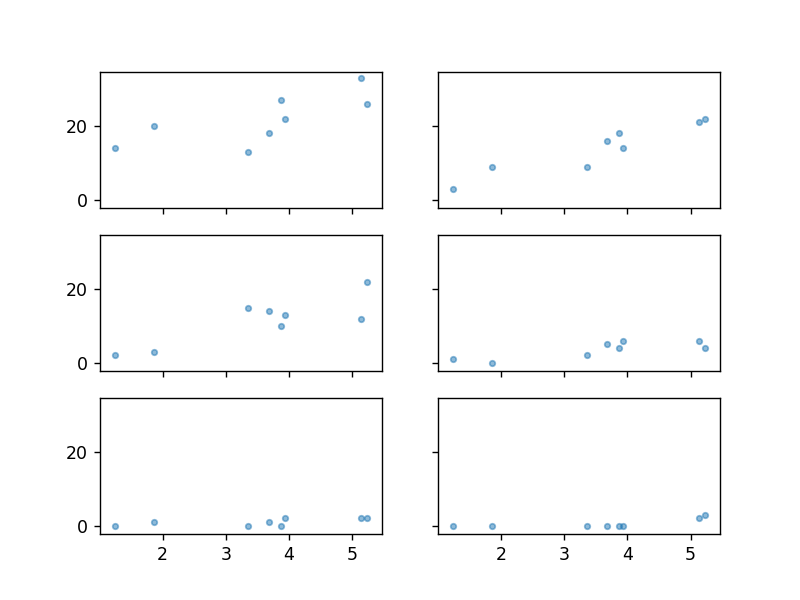

Column number 3 
 Slope = 3.53, Intercept = 9.114, rvalue = 0.727, p_value = 0.041, std_err = 1.361
Column number 51 
 Slope = 4.41, Intercept = -1.609, rvalue = 0.940, p_value = 0.001, std_err = 0.656
Column number 104 
 Slope = 3.94, Intercept = -2.580, rvalue = 0.851, p_value = 0.007, std_err = 0.991
Column number 500 
 Slope = 1.31, Intercept = -1.139, rvalue = 0.811, p_value = 0.014, std_err = 0.385
Column number 1000 
 Slope = 0.42, Intercept = -0.495, rvalue = 0.640, p_value = 0.087, std_err = 0.207
Column number 1500 
 Slope = 0.60, Intercept = -1.493, rvalue = 0.707, p_value = 0.050, std_err = 0.244


In [176]:
fig, axarr = plt.subplots(3,2, sharex = True, sharey = True)

columndata_x =  ARO4_moclo_genes.sum(axis=1)/len(ARO4_moclo_genes.columns)
for jj, ncol in enumerate([3,51,104,500,1000,1500]):
    ax = axarr.flatten()[jj]
    column_y = ARO4_moclo_genes.columns[ncol]
    columndata_y = ARO4_moclo_genes[column_y]
    ax.scatter(columndata_x, columndata_y, s = 10, alpha=0.5)
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
    print("Column number {} \n Slope = {:.2f}, Intercept = {:.3f}, rvalue = {:.3f}, p_value = {:.3f}, std_err = {:.3f}".format(ncol, slope, intercept, r_value, p_value, std_err))

<IPython.core.display.Javascript object>


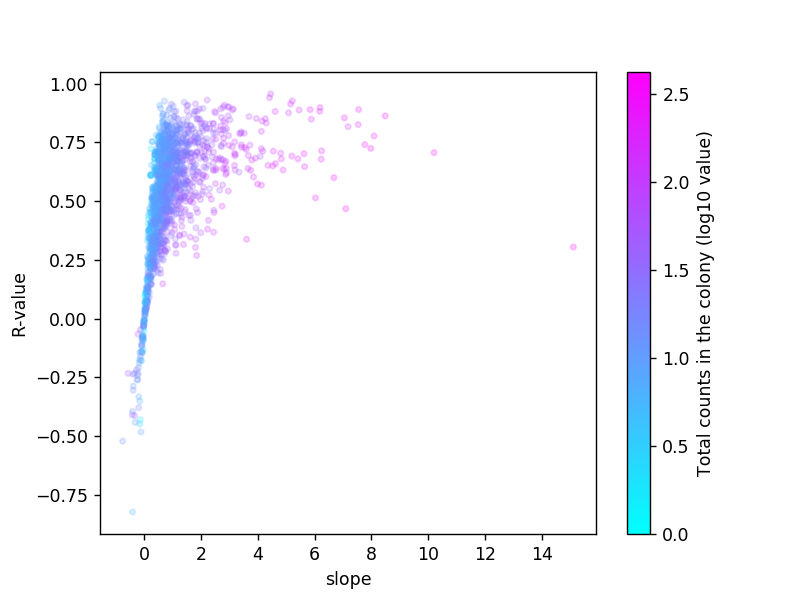

In [179]:
#Plot all R values against one another. 

columndata_x =  ARO4_moclo_genes.sum(axis=1)/len(ARO4_moclo_genes.columns)


fig, ax = plt.subplots()

r_values = []
slopes = []
intercepts = []
for col in ARO4_moclo_genes.columns: 
    columndata_y = ARO4_moclo_genes[col]
    slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
    r_values.append(r_value)
    slopes.append(slope)
    intercepts.append(intercept)

colordata = np.log10(ARO4_moclo_genes.sum())
#colordata = ARO4_lib_data_mincount.loc['total_counts',:]

ax.scatter(slopes, r_values, c=colordata, cmap = "cool", alpha = 0.2, s = 10)
ax.set_xlabel("slope")
ax.set_ylabel("R-value")


normalize = mpl_colors.Normalize(vmin=min(colordata), vmax=max(colordata))
#normalize = mpl_colors.LogNorm(vmin=min(colordata), vmax=max(colordata))

#ax1.set_xlim([-0.001, 0.0055])
# ax2 = axarr[0,1]
# ax2.scatter(intercepts, r_values, c = colordata, alpha = 0.2, s = 10)
# ax2.set_xlim([-0.08, 0.08])

cax, _ = mpl_colorbar.make_axes(ax)
cbar = mpl_colorbar.ColorbarBase(cax,cmap = 'cool', norm = normalize)
cbar.set_label("Total counts in the colony (log10 value)")

In [46]:
bulk_data = pd.read_csv(base_dir_rna_seq + os.sep + "expression_data" + os.sep + "20170817_klscpka" + os.sep + "20170817_klscpka_avg_counts_SC.csv")
bulk_data.rename(columns = {"0":"sc_genename"}, inplace = True) 


In [47]:
bulk_data['SC_common_name'] = io_library.SC_common_name_lookup(bulk_data["sc_genename"])

In [48]:
bulk_data_no_NMPP1 = bulk_data.loc[:,['SC_common_name','AS_noNMPP1_YPD_t40_mean','AS_yesNMPP1_YPD_t40_mean']]

In [240]:
ARO4_high_exp_genes_merged = ARO4_high_exp_genes.merge(bulk_data_no_NMPP1, left_index = True, right_on = "SC_common_name", how = 'inner')
ARO4_high_exp_genes_merged.set_index('SC_common_name', inplace = True)


In [490]:
data = []

conditions = {'WT': "AS_noNMPP1_YPD_t40_mean", 'PKA Inhibited': "AS_yesNMPP1_YPD_t40_mean" }


for condition, condition_label in conditions.items():
    xvalues = 10**ARO4_high_exp_genes_merged.loc[:,condition_label]
    yvalues = ARO4_high_exp_genes_merged.iloc[:,:-2].sum(axis = 1)

    trace = pygo.Scatter(
        x = list(xvalues), 
        y =  list(yvalues),
        text = ARO4_high_exp_genes_merged.index,
        mode = 'markers',
        marker = {'opacity': 0.5}, #, 
                  #'color': 'rgba'+str(cmap(NN/10))}, 
        name = condition
    )

    data.append(trace)


    layout = pygo.Layout(
        xaxis= {
            #"range":[-2, 20],
            "title":'Bulk data'
        },
        yaxis= {
            #"range":[-2, 20],
            "title":'Average expression'
        }, 
        width = 500, 
        height = 400
    )


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='ico_seq_colony_sum_vs_bulk')

In [49]:
#Bulk Data logged with pseudocount

ARO4_high_exp_genes_norm_log10_merged = ARO4_high_exp_genes.merge(bulk_data_no_NMPP1, left_index = True, right_on = "SC_common_name", how = 'inner')
ARO4_high_exp_genes_norm_log10_merged.set_index('SC_common_name', inplace = True)


In [53]:
ARO4_high_exp_genes_norm_log10_merged.shape[1]

1644

In [56]:
data = []

conditions = {'WT': "AS_noNMPP1_YPD_t40_mean", 'PKA Inhibited': "AS_yesNMPP1_YPD_t40_mean" }

ARO4_high_exp_genes_norm_log10_avg = ARO4_high_exp_genes_norm_log10_merged.iloc[:,:-2].sum(axis = 1)/ARO4_high_exp_genes_norm_log10_merged.shape[1]

for condition, condition_label in conditions.items():
    xvalues = ARO4_high_exp_genes_norm_log10_merged.loc[:,condition_label]
    yvalues = ARO4_high_exp_genes_norm_log10_avg

    trace = pygo.Scatter(
        x = list(xvalues), 
        y =  list(yvalues),
        text = ARO4_high_exp_genes_norm_log10_merged.index,
        mode = 'markers',
        marker = {'opacity': 0.5}, #, 
                  #'color': 'rgba'+str(cmap(NN/10))}, 
        name = condition
    )

    data.append(trace)


    layout = pygo.Layout(
        xaxis= {
            #"range":[-2, 20],
            "title":'Bulk data'
        },
        yaxis= {
            #"range":[-2, 20],
            "title":'Average expression'
        }, 
        width = 500, 
        height = 400
    )


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='ico_seq_colony_avg_log_vs_bulk')

In [501]:
ARO4_moclo_genes_bulk_merge.iloc[:,:-18].sum(axis =1)


4202    8431
4496    6046
3616    3060
5223    5510
5717    6362
1138    6467
1020    8590
5573    2044
dtype: int64

<IPython.core.display.Javascript object>


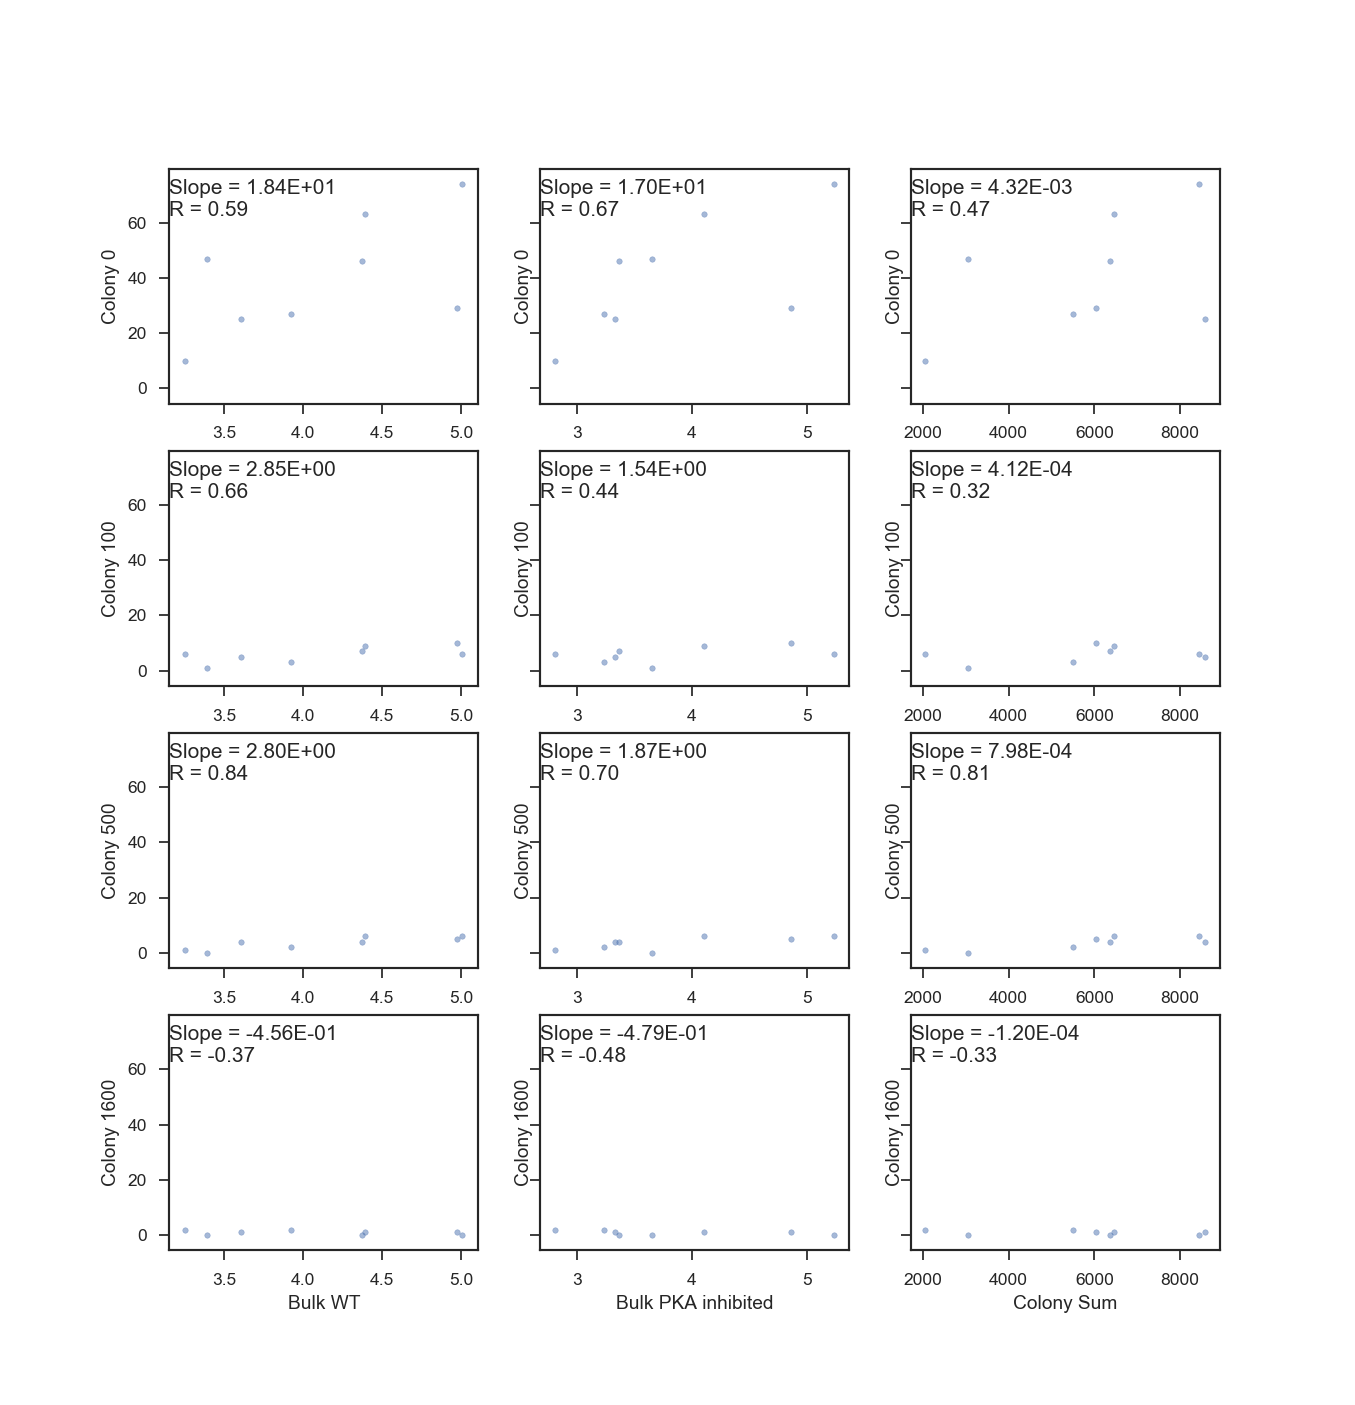

In [514]:
#just look at moclo genes
fig, axarr = plt.subplots(4,3, sharey = True)
#,
ARO4_moclo_genes_bulk_merge = ARO4_moclo_genes.merge(bulk_data, left_index = True, right_on = 'SC_common_name', how = 'left')

columndata_x_dict = {'Bulk WT': ARO4_moclo_genes_bulk_merge['AS_noNMPP1_YPD_t40_mean'],
                     'Bulk PKA inhibited': ARO4_moclo_genes_bulk_merge['AS_yesNMPP1_YPD_t40_mean'], 
                     'Colony Sum': ARO4_moclo_genes_bulk_merge.iloc[:,:-18].sum(axis =1)}

for kk, x_name in enumerate(columndata_x_dict.keys()):
    
    columndata_x = columndata_x_dict[x_name]  
    for jj, ncol in enumerate([0,100,500,1600]):
        ax = axarr[jj,kk]
        column_y = ARO4_moclo_genes.columns[ncol]
        columndata_y = ARO4_moclo_genes[column_y]
        ax.scatter(columndata_x, columndata_y, s = 10, alpha=0.5)
        slope, intercept, r_value, p_value, std_err = stats.linregress(columndata_x,columndata_y)
        ax.set_ylabel("Colony " + str(ncol))
        ax.text(0,0.8, "Slope = {:.2E}\nR = {:.2f}".format(slope, r_value),transform=ax.transAxes)
        if jj==3:
            ax.set_xlabel(x_name)
    

<IPython.core.display.Javascript object>


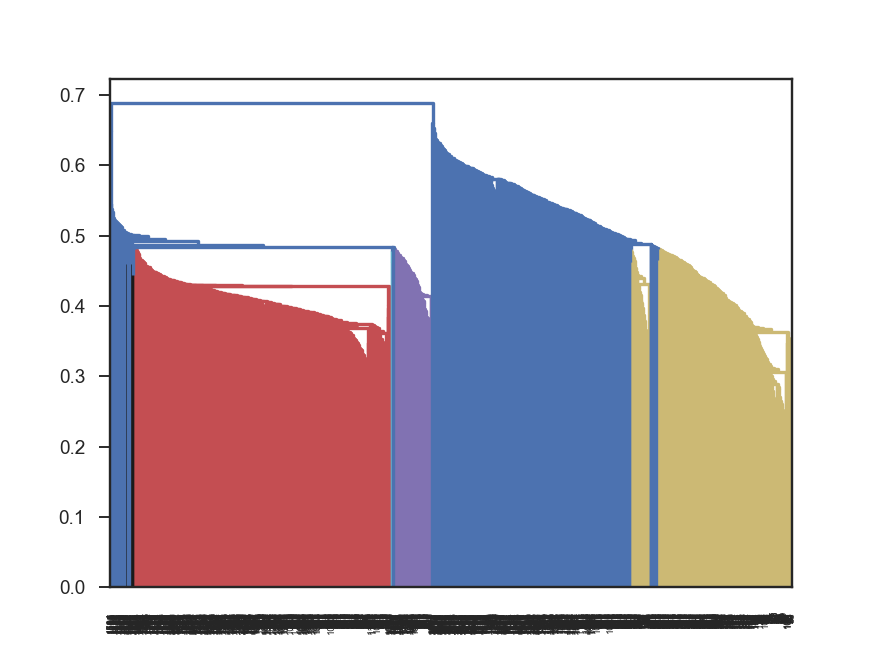

In [8]:
#Heirarchical cluster genes (using log normalized values)

#row_cluster
ARO4_mat = ARO4_high_exp_genes_norm_log10.values
row_cluster = sch.linkage(ARO4_mat, method='average')
row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = ARO4_high_exp_genes_norm_log10.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

ARO4_high_exp_genes_norm_log10_reorder =ARO4_high_exp_genes_norm_log10.reindex(new_rows)

col_cluster = sch.linkage(ARO4_mat.transpose(), method='average', metric = 'correlation')
col_dend = sch.dendrogram(col_cluster)
col_ind_reorder = col_dend['leaves']

old_cols = ARO4_high_exp_genes_norm_log10.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder]

ARO4_high_exp_genes_norm_log10_reorder =ARO4_high_exp_genes_norm_log10_reorder[new_cols]




In [538]:
set(gene_list) & set(ARO4_high_exp_genes_norm_reorder.index)

{'ABF2', 'ACT1', 'ADE12', 'AHP1', 'AI4', 'AIM13'}

<IPython.core.display.Javascript object>


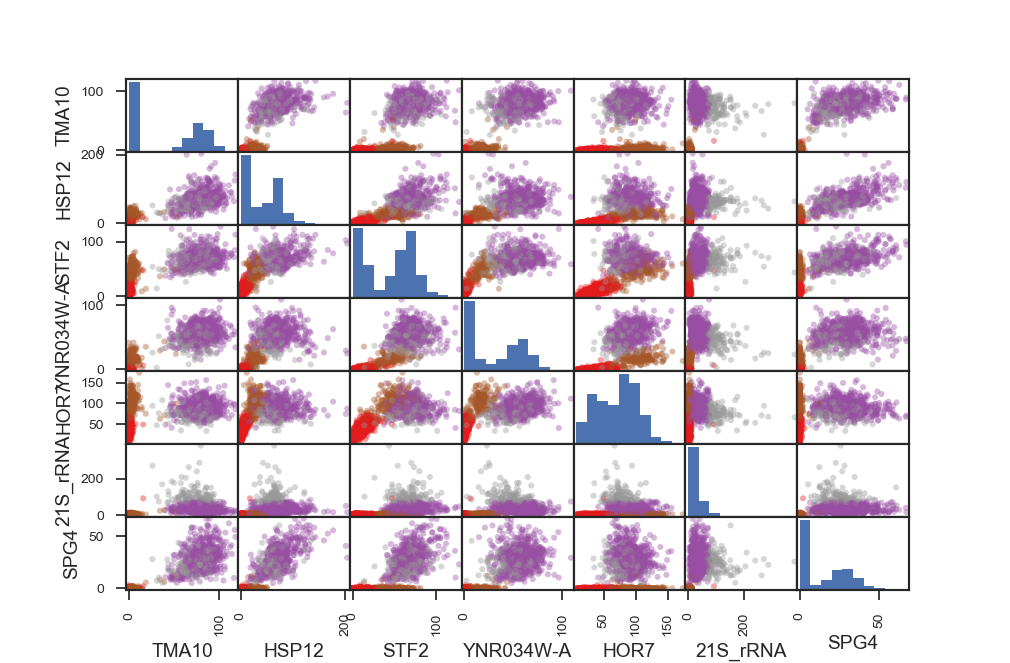

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C5900A4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021C27C35DA0>]], dtype=object)

In [560]:
# fix, ax = plt.subplots()
# x = ARO4_high_exp_genes_norm_reorder.loc['LYS12',:]
# y = ARO4_high_exp_genes_norm_reorder.loc['LEU1',:]
# ax.scatter(x,y, alpha = 0.2)
gene_list = ['TMA10','HSP12','STF2','YNR034W-A','HOR7','21S_rRNA','SPG4'] #['GLN1','SER3','LYS12','MET14','LEU1'] #['AI4', '15S_rRNA','AIM13'] #'21S_rRNA','ABF2','ADE12','ACT1','AHP1',
#['RPL41A','RPL23B','RPL29','RPS30A','RPS10A']
#['OLI1', 'FMP43', 'RGI2', 'YDR119W-A']
#['SPG4', 'SPG1']
#['VAM10', 'VAM7', 'VAM8'] these aren't highly expressed enough
#['GLN1','SER3','LYS12','MET14','LEU1'] these ones are,
pd.plotting.scatter_matrix(ARO4_high_exp_genes_norm.loc[gene_list, :].transpose(), c = kmeans.labels_, cmap = "Set1", alpha = 0.4)



<IPython.core.display.Javascript object>


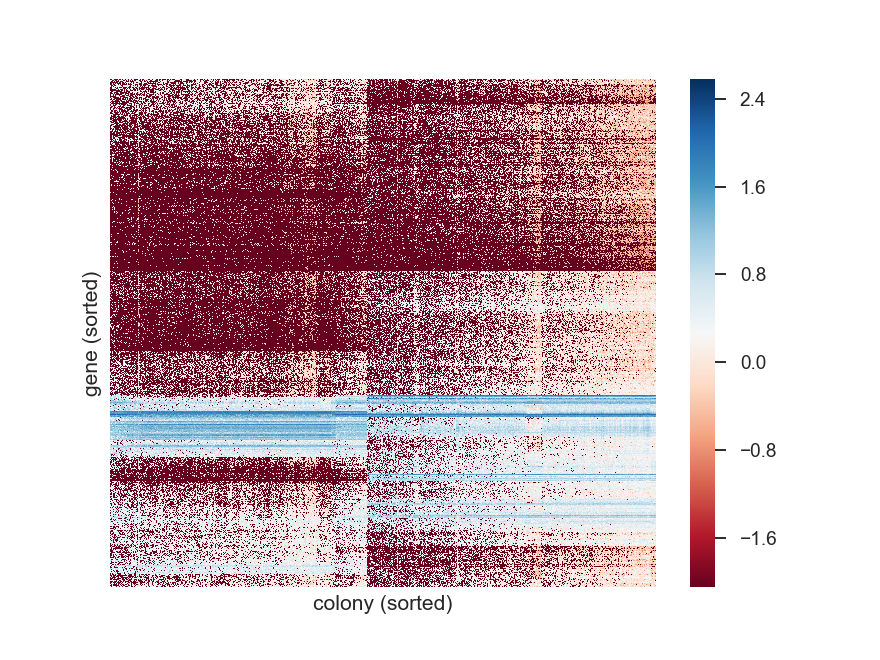

In [11]:
fig, ax = plt.subplots()
#ax = plt.imshow(ARO4_high_exp_genes_norm_reorder.values, interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin=0, vmax = 5)
sns.heatmap(ARO4_high_exp_genes_norm_log10_reorder,cmap = 'RdBu', xticklabels=False, yticklabels=False)
ax.set_xlabel("colony (sorted)")
ax.set_ylabel("gene (sorted)")



[ 0.71270728  0.04806942  0.03290994]
[ 4673.40551321  1213.70269522  1004.24899984]


<IPython.core.display.Javascript object>


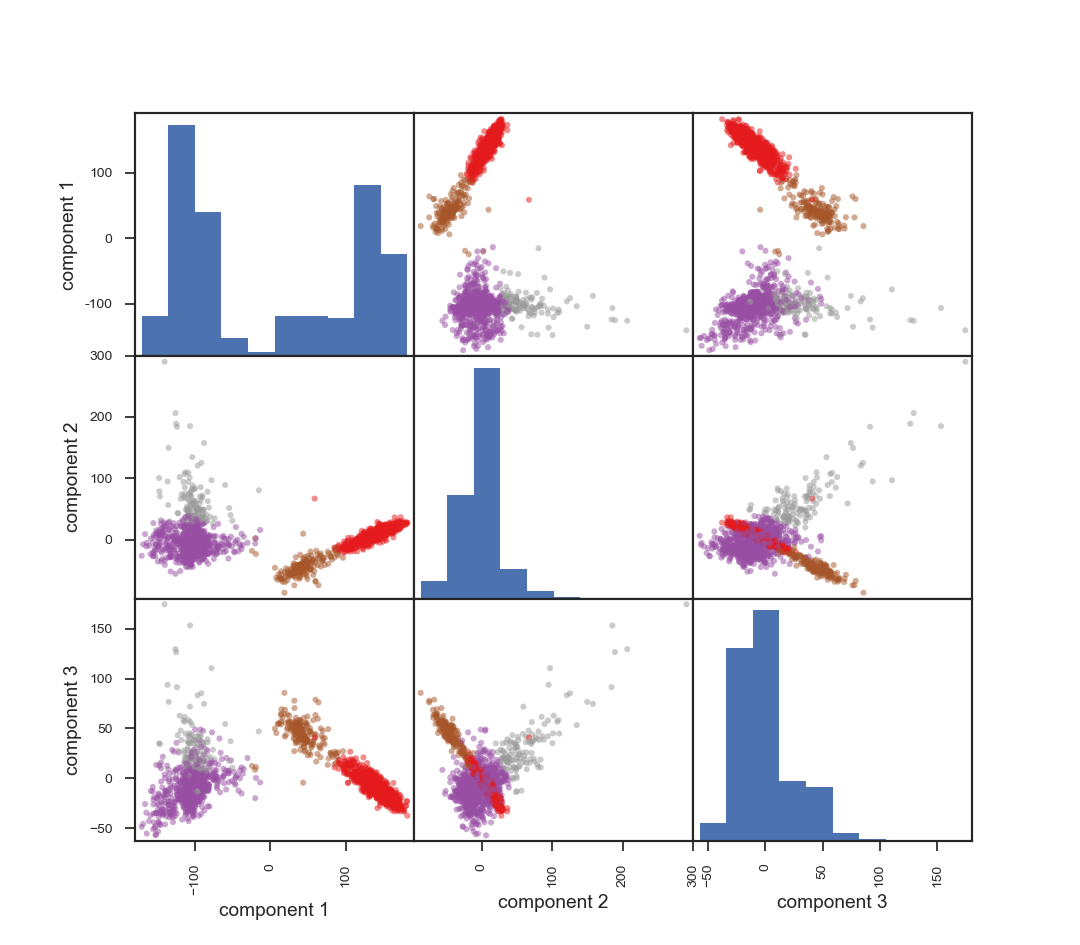

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C6E9926D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021C6EE64588>]], dtype=object)

In [481]:
pca = PCA(n_components=3)
pca.fit(ARO4_high_exp_genes_norm_mat.transpose())
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  
ARO4_high_exp_genes_PCA = pca.fit_transform(ARO4_high_exp_genes_norm_mat.transpose())
ARO4_high_exp_genes_PCA_df = pd.DataFrame(ARO4_high_exp_genes_PCA.transpose(), index = ["component 1", "component 2", "component 3"], columns = ARO4_high_exp_genes.columns )
kmeans = KMeans(n_clusters=4).fit(ARO4_high_exp_genes_PCA_df.transpose().values)
pd.plotting.scatter_matrix(ARO4_high_exp_genes_PCA_df.transpose(), c = kmeans.labels_, cmap = "Set1")


In [577]:
ARO4_high_exp_genes_PCA_df.transpose()[ARO4_high_exp_genes_PCA_df.transpose()["component 1"]>50]

component 1  component 2  component 3
CTAGCCAGCC   116.255192     0.379353    -2.365216
GCCCGACCCT   122.881452     3.424525    -4.271438
GTTACCCCCA   107.740394    -5.667624     2.250576
GCTTCCCTTA   125.428935     6.271573    -8.003407
TTTCAGAAAC   133.962173     1.886657    -4.213530
ACAGCCGAGC   115.757539     3.163273    -4.416867
GTCCGCCTTC   138.015020     3.201122    -4.711618
CAATATCCGG   144.127393     7.735796   -11.238998
TCGTCCCTGA   132.512890     1.767578    -3.376927
CCCAATAACT   124.792595     3.070551     1.278619
CCCCCTCATC    54.833444   -33.855271    32.360477
GTCTATCCAG    51.773977   -37.800985    46.986788
ACCCAGACCG    84.831429   -13.649412    13.758875
CCGCAGCGTT   147.212434     9.219497    -9.245329
GTCGGCCGCC   123.125445     3.346195   -10.580479
CAATTTGATC   151.385012    14.794864   -10.546434
CGTTGTGCGC   121.466183    -7.805983     4.508011
CTCCGCTCCC   166.830844    12.993653   -14.627094
TTCCAGGCTA   125.774436    -3.322018     4.270706
GTGTTGCCTC   166.836221    17.290869   -15.639950
CACCAAGATC    79.921791   -27.488302    25.549822
CTGGGTCGGA   124.092920    10.909952    -5.240291
TCGAGAGGTC   117.818427    -6.331621     2.780203
CTTCGGTCGT   125.347269    -0.662583    -2.644190
GGTGTCTTTA   138.428149     9.998912   -11.043443
TGAAGCGATA   106.278975   -11.648846     3.522078
AATATTAATC   105.260532   -15.699705    13.006442
GGGCGTTCGA   152.705341    18.235032   -25.066756
ACACTAAGAC   169.019159    20.759443   -25.100357
CAACATGGAC   124.787410     7.477163    -6.823452
...                 ...          ...          ...
GTAGATGGGC   126.599811     1.026157     1.164185
CTGTTTGCTA    77.169607   -23.387072    20.042487
CTTATAAGTG   124.671256     2.177565     3.733959
TAATCCTCCA   130.969542     4.840596     0.667354
TCTCTCCAAA   142.335372    16.046316    -6.565201
AAGATGAAAG   112.066062    -2.943047    -3.918097
CGCTCAGAAC   112.929702    -7.153412     6.275207
CGATATCTGA    84.874036   -29.346255    26.613840
TTCTCTAAAA    69.849598   -29.884477    35.620623
TTGGACCGCT    59.919137   -37.204489    40.730714
AGAAGGTGAT   107.498799     2.955367    -0.965077
CAATACTTTC   131.314229     7.815820     4.065504
TCGGGGACAT   113.848814    -8.599143     5.731669
ACGTATCATC   102.682650   -17.042191    14.802514
ATGGATTACC    60.736342   -18.117215    16.803128
ATGGTCCCTC   109.352863   -15.218876    18.911994
GACAAGCTGC    69.373627   -34.851591    47.709547
CCCTATGCCG   102.687628    -4.216485     5.150712
TAGTCAGACA    66.616673   -25.666926    29.920371
CAATACGACA    71.793229   -29.516863    34.070707
CATGCACCGC   135.935709     5.737404    -7.834589
AGTGATTACG   108.906675   -14.351521    17.324461
CTTTAAAAGT   101.328545   -10.211562     7.957256
GATCTTGGTC    56.721851   -57.739174    58.303364
CTCCATTGCT   117.065645    -5.720810     5.135304
TCTAATGTGC    63.720180   -74.455755    76.113203
TGGCGGAATG   102.741032    -1.528373    -4.640695
ATACCGTGCT    58.572908    66.902157    40.920181
CCCTTGCTCT    59.833653   -67.498976    78.833548
TAGCGTGGTA    76.598220   -39.757560    49.416496

[652 rows x 3 columns]

<IPython.core.display.Javascript object>


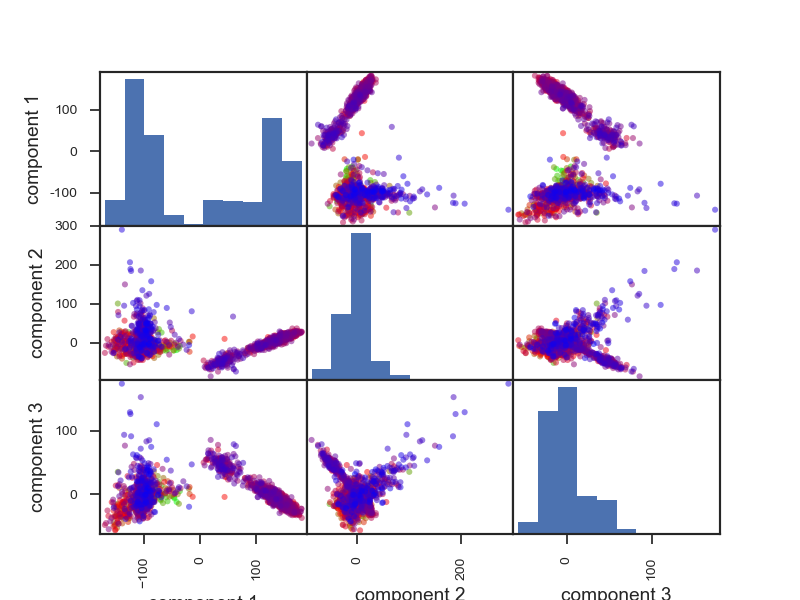

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B91687F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021B828404E0>]], dtype=object)

In [571]:
pd.plotting.scatter_matrix(ARO4_high_exp_genes_PCA_df.transpose(), c = np.log(ARO4_high_exp_genes.sum()), cmap = "brg")

In [548]:
N_top_genes = 30
component_genes = {}
for component in [0,1,2]:
    print("Principal component " + str(component+1))
    for sign in ['negative','positive']: 
        if sign=='positive': 
            genes = pd.Series(pca.components_[component], index = ARO4_high_exp_genes_norm.index).sort_values()[-N_top_genes:].sort_values(ascending=False)
        elif sign=='negative': 
            genes = pd.Series(pca.components_[component], index = ARO4_high_exp_genes_norm.index).sort_values()[0:N_top_genes].sort_values(ascending=True)
        print('genes with largest magnitude' + sign + 'coefficients')
        component_genes['PC{} {} genes'.format(component+1, sign)] = list(genes.index)
        component_genes['PC{} {} values'.format(component+1, sign)] = list(genes.values)
        for item, value in genes.iteritems():
            print("{} \t {:.3f}".format(item, value))

component_genes_df = pd.DataFrame(component_genes)
component_genes_df.to_csv(data_processing_dir + os.sep + 'top_positive_negative_pc_genes_raw.csv')

Principal component 1
genes with largest magnitudenegativecoefficients
TMA10 	 -0.327
HSP12 	 -0.283
STF2 	 -0.237
YNR034W-A 	 -0.224
HOR7 	 -0.202
21S_rRNA 	 -0.171
YDR034W-B 	 -0.136
SPG4 	 -0.123
RGI1 	 -0.099
YER121W 	 -0.087
PMP3 	 -0.068
YBR085C-A 	 -0.061
SPG1 	 -0.060
YHR138C 	 -0.059
CUP1-2 	 -0.053
CYC7 	 -0.052
CUP1-1 	 -0.052
AIM41 	 -0.051
FMP43 	 -0.045
RDL1 	 -0.044
QCR8 	 -0.043
TRX2 	 -0.039
SOD1 	 -0.037
GLC8 	 -0.037
RGI2 	 -0.037
CRS5 	 -0.036
YLR257W 	 -0.033
HMRA1 	 -0.033
YOR052C 	 -0.032
YKL065W-A 	 -0.031
genes with largest magnitudepositivecoefficients
RPL41A 	 0.268
RPL23B 	 0.235
RPL29 	 0.217
RPS30A 	 0.211
RPS10A 	 0.203
RPL26B 	 0.162
RPS17A 	 0.140
RPS31 	 0.122
RPL24A 	 0.119
YFR032C-B 	 0.118
RPL43B 	 0.108
RPS23A 	 0.108
RPS10B 	 0.096
RPL35A 	 0.091
RPL38 	 0.085
RPS18A 	 0.080
RPS21A 	 0.079
RPL34B 	 0.078
RPS17B 	 0.077
RPL35B 	 0.076
RPL42B 	 0.075
RPS30B 	 0.074
RPL40A 	 0.069
RPS27B 	 0.068
RPS12 	 0.066
RPS18B 	 0.063
RPL24B 	 0.063
RPS23B 	 0.

<IPython.core.display.Javascript object>


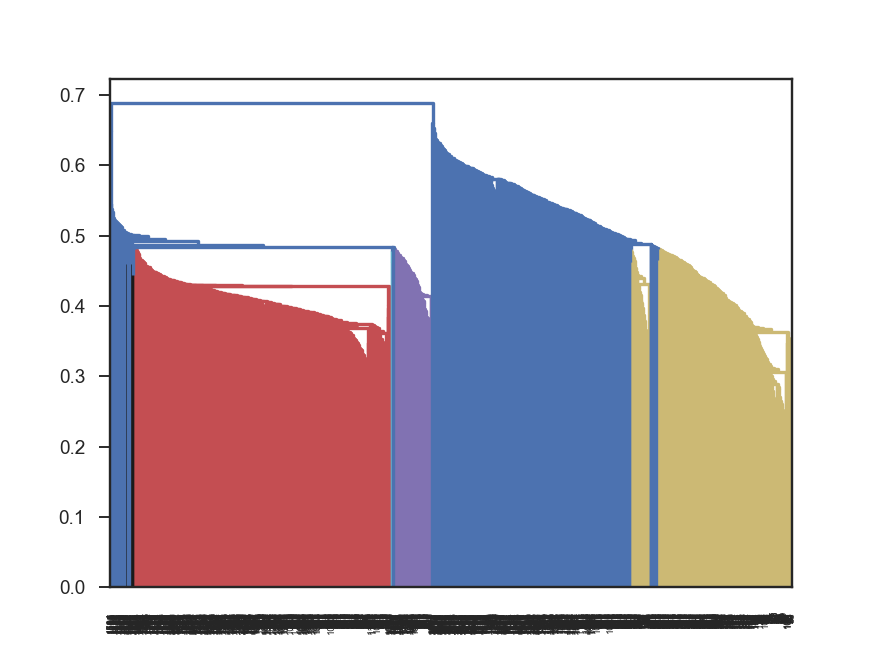

<IPython.core.display.Javascript object>


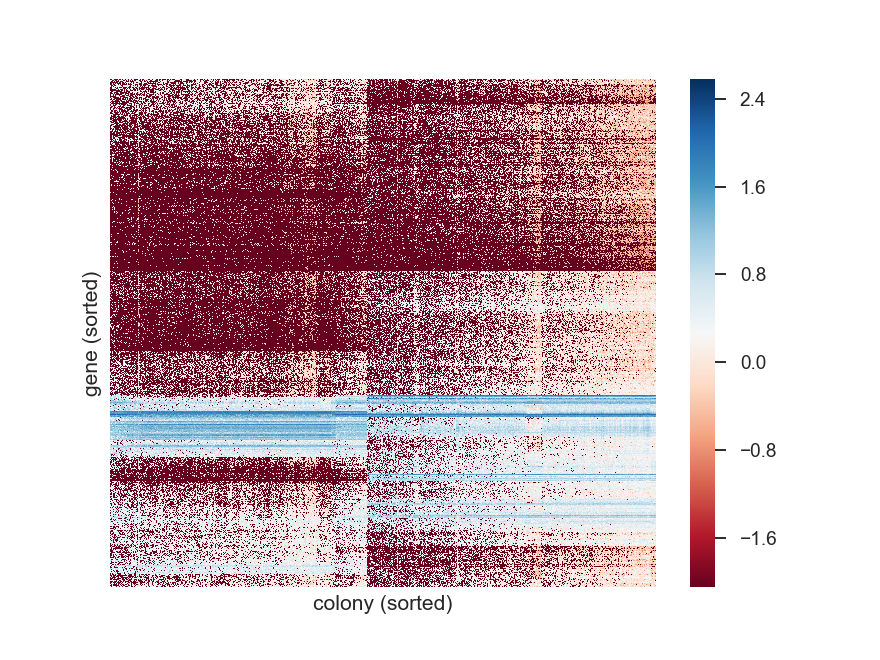

In [12]:
#Heirarchical cluster genes with log

#row_cluster
ARO4_high_exp_genes_norm_log10_mat = ARO4_high_exp_genes_norm_log10.values
row_cluster = sch.linkage(ARO4_high_exp_genes_norm_log10_mat, method='average')
row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = ARO4_high_exp_genes_norm_log10.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

ARO4_high_exp_genes_norm_log10_reorder =ARO4_high_exp_genes_norm_log10.reindex(new_rows)

col_cluster = sch.linkage(ARO4_high_exp_genes_norm_log10_mat.transpose(), method='average', metric = 'correlation')
col_dend = sch.dendrogram(col_cluster)
col_ind_reorder = col_dend['leaves']

old_cols = ARO4_high_exp_genes_norm_log10.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder]

ARO4_high_exp_genes_norm_log10_reorder =ARO4_high_exp_genes_norm_log10_reorder[new_cols]

fig, ax = plt.subplots()
#ax = plt.imshow(ARO4_high_exp_genes_norm_reorder.values, interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin=0, vmax = 5)
sns.heatmap(ARO4_high_exp_genes_norm_log10_reorder,cmap = 'RdBu', xticklabels=False, yticklabels=False)
ax.set_xlabel("colony (sorted)")
ax.set_ylabel("gene (sorted)")
#vmin = 0, vmax = 6,

<IPython.core.display.Javascript object>


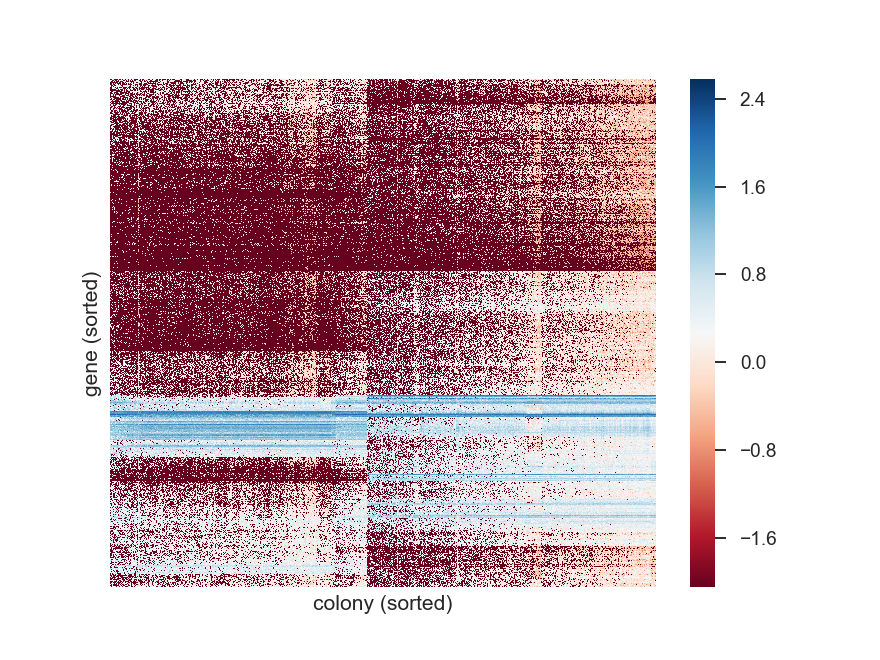

In [13]:
fig, ax = plt.subplots()
#ax = plt.imshow(ARO4_high_exp_genes_norm_reorder.values, interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin=0, vmax = 5)
sns.heatmap(ARO4_high_exp_genes_norm_log10_reorder,cmap = 'RdBu', xticklabels=False, yticklabels=False)
ax.set_xlabel("colony (sorted)")
ax.set_ylabel("gene (sorted)")
#vmin = 0, vmax = 6,

In [ ]:
ARO4_high_exp_genes_log10_PCA.transpose()

[ 0.20213336  0.04721118  0.01030553]
[ 575.13160081  277.9525465   129.86236845]


<IPython.core.display.Javascript object>


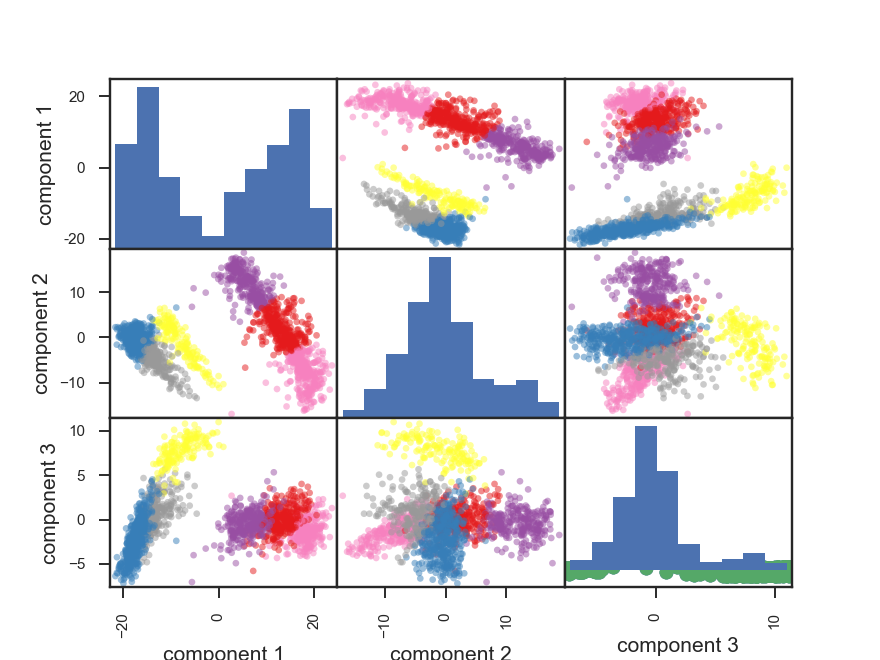

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002059D88C2E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002059E06E390>]], dtype=object)

In [21]:
n_components = 3
pca = PCA(n_components=n_components)
pc_names = ["component " + str(jj+1) for jj in range(n_components)]

pca.fit(ARO4_high_exp_genes_norm_log10_mat.transpose())
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  
ARO4_high_exp_genes_log10_PCA = pca.fit_transform(ARO4_high_exp_genes_norm_log10_mat.transpose())
ARO4_high_exp_genes_log10_PCA_df = pd.DataFrame(ARO4_high_exp_genes_log10_PCA.transpose(), index = pc_names, columns = ARO4_high_exp_genes.columns )
kmeans = KMeans(n_clusters=6).fit(ARO4_high_exp_genes_log10_PCA_df.transpose().values)
pd.plotting.scatter_matrix(ARO4_high_exp_genes_log10_PCA_df.transpose(), c = kmeans.labels_, cmap = "Set1")

In [31]:
#projection into Linear combination of PC space 

#choose new origin (x is for PC1 , y is for PC2, xp and yp are for new axes)
x0 = 3.1
y0 = -1.6

#choose point that determines direction for xp
x_xp = 20.9
y_xp = 10.5

#find point that determines direction for yp (ensure it is orthogonal to direction xp)
x_yp = -6.9
y_yp = y0 - (x_xp-x0)*(x_yp-x0)/(y_xp-y0)

xp = np.array([x_xp-x0, y_xp-y0])
yp = np.array([x_yp-x0, y_yp-y0])

xp_unit = xp/np.linalg.norm(xp)
yp_unit = yp/np.linalg.norm(yp)




In [46]:
xp_unit.reshape(1,2)

array([[ 0.82701291,  0.56218293]])

In [52]:
yp_unit

array([-0.56218293,  0.82701291])

In [51]:
xp_unit

array([ 0.82701291,  0.56218293])

array([[ 0.82701291,  0.56218293],
       [-0.56218293,  0.82701291]])

In [50]:
a = np.array([[1,2],[4,5],[6,7]])
a.dot(xp_unit)

array([ 1.95137877,  6.11896629,  8.89735798])

In [58]:
np.array([xp_unit, yp_unit]).dot(a.transpose())

array([[ 1.95137877,  6.11896629,  8.89735798],
       [ 1.09184288,  1.88633281,  2.41599277]])

<IPython.core.display.Javascript object>


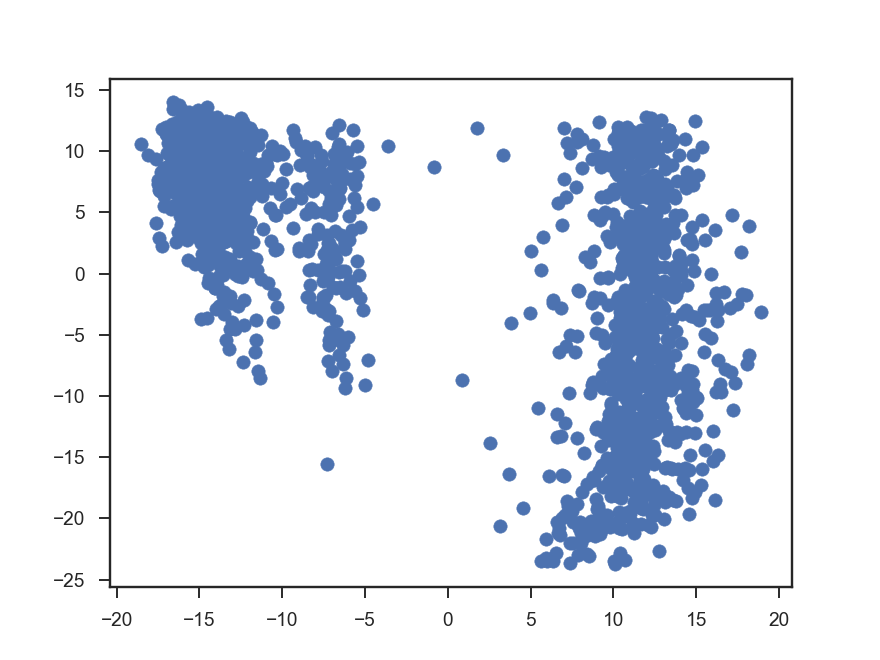

In [71]:
fig, ax = plt.subplots()
ARO4_data_xpyp = np.array([xp_unit, yp_unit]).dot(ARO4_high_exp_genes_log10_PCA_df.loc[['component 1', 'component 2'], :].values)
ax.scatter(ARO4_data_xpyp[0],ARO4_data_xpyp[1])
#ax.scatter(ARO4_data_xpyp[0],ARO4_high_exp_genes_log10_PCA_df.loc[['component 3'], :].values)

            

In [23]:
ARO4_high_exp_genes_log10_PCA_df

AGGTTAGACG  CTGTCATTGT  CTTGTGTCAG  CAGGCCTTCC  TAATTCGCCT  \
component 1    18.47252   18.126662   21.681559   22.018765   17.845245   
component 2   -15.85911  -16.040630  -13.958278  -13.322170  -16.221405   
component 3    -3.68369   -2.727760   -2.143816   -3.061001   -3.628021   

             AATAGTTAGG  AAGAGTTACA  CCAAGTGTTT  GGCCGTTACA  CTGAGGTTTC  \
component 1   23.277119   17.977558   21.465229   21.389521   18.912947   
component 2  -11.563837  -15.868396  -13.750634  -13.011405  -13.356496   
component 3   -1.982466   -3.336803   -2.805343   -2.347183   -2.862077   

                ...      GACGATTCCT  AGTGAACTCG  AAGTAGAGCA  GAGACGTCTG  \
component 1     ...        5.225045    0.520142    3.469729    1.766247   
component 2     ...       16.317360   13.628910   16.814714   15.707939   
component 3     ...       -1.156709   -2.926534    2.091694    0.452532   

             TTCAAAGAGG  ATACCTCACA  AGAGTCTTCA  ACGAAATCCC  GTTGCAGGTC  \
component 1    3.004145    3.660596    2.799236    2.645689    5.081725   
component 2   15.513515   16.573201   15.199217   14.431542   16.076490   
component 3   -1.912995    0.266889    0.971796   -0.318073   -0.461089   

             CGAGTCTCTA  
component 1    1.969172  
component 2   15.444267  
component 3   -0.729252  

[3 rows x 1642 columns]

In [74]:
len(xp_unit[0]*pca.components_[0] + xp_unit[1]*pca.components_[1])

1064

In [66]:
N_top_genes = 30
component_genes = {}
for component in [0,1,2,3]:
    print("Principal component " + str(component+1))
    for sign in ['negative','positive']: 
        if sign=='positive': 
            genes = pd.Series(pca.components_[component], index = ARO4_high_exp_genes_norm_log10.index).sort_values()[-N_top_genes:].sort_values(ascending=False)
        elif sign=='negative': 
            genes = pd.Series(pca.components_[component], index = ARO4_high_exp_genes_norm_log10.index).sort_values()[0:N_top_genes].sort_values(ascending=True)
        print('genes with largest magnitude' + sign + 'coefficients')
        component_genes['PC{} {} genes'.format(component+1, sign)] = list(genes.index)
        component_genes['PC{} {} values'.format(component+1, sign)] = list(genes.values)
        for item, value in genes.iteritems():
            print("{} \t {:.3f}".format(item, value))

component_genes_df = pd.DataFrame(component_genes)
component_genes_df.to_csv(data_processing_dir + os.sep + 'top_positive_negative_log_pc_genes_raw.csv')

Principal component 1
genes with largest magnitudenegativecoefficients
RPL33B 	 -0.043
RPS25B 	 -0.040
RPL22B 	 -0.036
NIP7 	 -0.034
RPL21B 	 -0.031
RPS19A 	 -0.030
TIF11 	 -0.029
APQ12 	 -0.028
NRK1 	 -0.027
GPX2 	 -0.027
CGR1 	 -0.026
RPB10 	 -0.025
RPS27A 	 -0.025
YBL028C 	 -0.024
URM1 	 -0.023
RPS18B 	 -0.022
RPL34A 	 -0.022
POP8 	 -0.022
YSY6 	 -0.022
RPS22B 	 -0.021
RPL14A 	 -0.021
GLN1 	 -0.020
DTD1 	 -0.020
RPS29A 	 -0.020
RPS17B 	 -0.019
RPL36A 	 -0.019
RPL26A 	 -0.019
RPS30B 	 -0.018
NOP10 	 -0.018
RBL2 	 -0.018
genes with largest magnitudepositivecoefficients
SPG4 	 0.083
SPG1 	 0.082
RGI2 	 0.080
YDR034W-B 	 0.075
MRK1 	 0.075
YGR035C 	 0.074
YOR019W 	 0.074
YDR119W-A 	 0.070
FMP43 	 0.069
YKL065W-A 	 0.067
HXT6 	 0.066
OM14 	 0.066
FMP46 	 0.064
YLR312C 	 0.064
OLI1 	 0.063
YGR161W-C 	 0.063
YGR174W-A 	 0.063
CRS5 	 0.063
UIP4 	 0.062
HXT7 	 0.062
GPX1 	 0.061
YER121W 	 0.061
DDR2 	 0.061
MSC1 	 0.061
YPR036W-A 	 0.061
TDH1 	 0.060
NQM1 	 0.060
SCEI 	 0.060
FOX2 	 0.060
YB

In [79]:
component_genes_df

Yp negative genes  Yp negative values Yp positive genes  Yp positive values
0             MRPL38           -0.050477          21S_rRNA            0.005946
1               UBC7           -0.050169            RPL24A            0.001535
2              MRP17           -0.049455            CUP1-1            0.001421
3               CUE1           -0.048889            CUP1-2            0.000883
4               MNP1           -0.048788              SWE1            0.000479
5          YBR230W-A           -0.048664             AIM41           -0.000025
6              MRPS8           -0.047243            RPL41A           -0.000738
7              TVP18           -0.046733            RPL23B           -0.001194
8               SRB6           -0.046717             RPS31           -0.001425
9             MRPL49           -0.046529         YBR085C-A           -0.001843
10              DAD4           -0.046310              MTC6           -0.002005
11         YBR201C-A           -0.045591             RPL29           -0.002051
12         YKL033W-A           -0.045300             HMRA1           -0.002114
13             RPL2B           -0.045275            RPL41B           -0.002238
14              TDH2           -0.045258              TRX2           -0.002600
15              COS4           -0.045030              STF2           -0.002683
16             VPS60           -0.044927              SIP5           -0.002922
17              FIS1           -0.044768             RPL38           -0.003031
18            RPL40B           -0.044562              YMC1           -0.003139
19             SRP21           -0.044424              HOR7           -0.003333
20              MIM1           -0.044304              PMP3           -0.004031
21            RPL18A           -0.044236             PRP28           -0.004205
22             TVP15           -0.044205              BIR1           -0.004428
23             ATP20           -0.044029              ZEO1           -0.004432
24              HUB1           -0.043968              URB1           -0.004747
25         YBR126W-A           -0.043910            RPS30A           -0.004893
26             ISD11           -0.043904             RPS12           -0.004952
27              COX6           -0.043877            RPL27A           -0.004997
28              SKP1           -0.043859              SSS1           -0.005015
29              SFT1           -0.043791              HHT1           -0.005328

In [84]:
component_genes

{'Yp negative genes': ['MRPL38',
  'UBC7',
  'MRP17',
  'CUE1',
  'MNP1',
  'YBR230W-A',
  'MRPS8',
  'TVP18',
  'SRB6',
  'MRPL49',
  'DAD4',
  'YBR201C-A',
  'YKL033W-A',
  'RPL2B',
  'TDH2',
  'COS4',
  'VPS60',
  'FIS1',
  'RPL40B',
  'SRP21',
  'MIM1',
  'RPL18A',
  'TVP15',
  'ATP20',
  'HUB1',
  'YBR126W-A',
  'ISD11',
  'COX6',
  'SKP1',
  'SFT1'],
 'Yp negative values': [-0.050477421262736674,
  -0.050169317600204641,
  -0.049455077316112997,
  -0.048889184930620749,
  -0.04878800184050619,
  -0.048663552836712906,
  -0.047242982201729393,
  -0.046732750844672294,
  -0.046716731076306223,
  -0.046529227690150887,
  -0.046309763550705374,
  -0.045591153573813714,
  -0.04530047126195292,
  -0.045275414451120294,
  -0.045257877864364027,
  -0.045030035656694369,
  -0.044926877312925328,
  -0.04476776829752542,
  -0.044562190287465532,
  -0.044424390833551805,
  -0.044303602355191957,
  -0.04423603691342657,
  -0.044205274001192105,
  -0.04402945028166412,
  -0.043968289505708351,

In [86]:
transformed_genes = {'Xp': xp_unit[0]*pca.components_[0] + xp_unit[1]*pca.components_[1], 
                     'Yp': yp_unit[0]*pca.components_[0] + yp_unit[1]*pca.components_[1]}


N_top_genes = 30
component_genes = {}
for direction, transformed_gene_set in transformed_genes.items():
    print(direction + " genespace")
    for sign in ['negative','positive']: 
        if sign=='positive': 
            genes = pd.Series(transformed_gene_set, index = ARO4_high_exp_genes_norm_log10.index).sort_values()[-N_top_genes:].sort_values(ascending=False)
        elif sign=='negative': 
            genes = pd.Series(transformed_gene_set, index = ARO4_high_exp_genes_norm_log10.index).sort_values()[0:N_top_genes].sort_values(ascending=True)
        #print('genes with largest magnitude' + sign + 'coefficients')
        print('{} {} genes'.format(direction, sign))
        component_genes['{} {} genes'.format(direction, sign)] = list(genes.index)
        component_genes['{} {} values'.format(direction, sign)] = list(genes.values)
#         for item, value in genes.iteritems():
#             print("{} \t {:.3f}".format(item, value))

component_genes_df = pd.DataFrame(component_genes)
component_genes_df.to_csv(data_processing_dir + os.sep + 'top_positive_negative_log_transformed_genes_raw.csv')

Xp genespace
Xp negative genes
Xp positive genes
Yp genespace
Yp negative genes
Yp positive genes


<IPython.core.display.Javascript object>


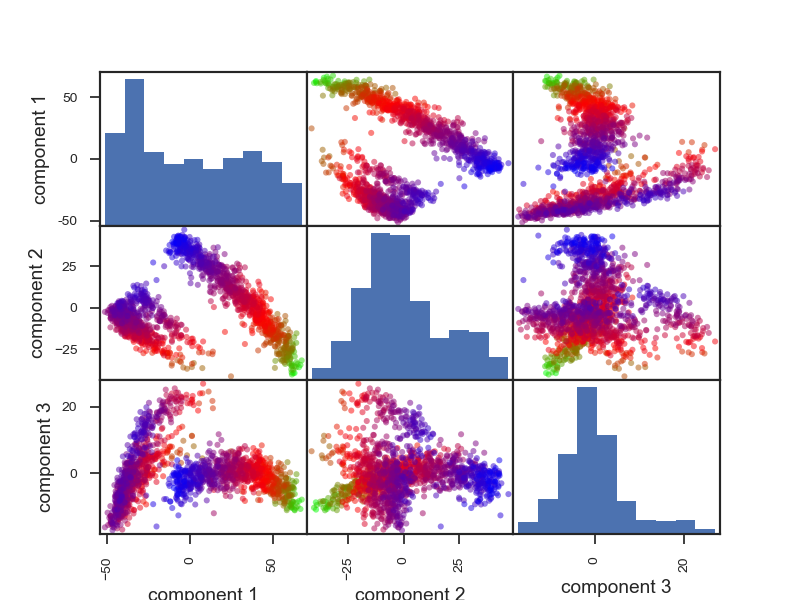

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C759DC0B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C75A5A2DD8>]], dtype=object)

In [67]:
pd.plotting.scatter_matrix(ARO4_high_exp_genes_log10_PCA_df.transpose(), c = np.log(ARO4_high_exp_genes.sum()), cmap = "brg")

In [77]:
np.log(ARO4_high_exp_genes.sum())

AGGTTAGACG    10.186936
CTGTCATTGT    10.131459
CTTGTGTCAG    10.088846
CAGGCCTTCC    10.017441
TAATTCGCCT     9.970913
AATAGTTAGG     9.924368
AAGAGTTACA     9.898475
CCAAGTGTTT     9.809287
GGCCGTTACA     9.810714
CTGAGGTTTC     9.815858
CGGCTCACCC     9.812797
ACATCTCACT     9.781602
ATTCTTAGTA     9.784929
GCCTTGGTAC     9.730383
TTGGTCCTTT     9.751327
AGGACGTTAA     9.738259
GGGGTCCTTC     9.719324
AGTGCGCCAA     9.720105
GTCCTGTCAT     9.713597
GCTAGATATG     9.604745
TTGTAGAATT     9.612266
ATTCGTGAAT     9.614938
CAGGTTGTCT     9.586308
AGCTCAGTCC     9.587475
TTTTAGAAAC     9.566195
CTGCCATGGC     9.559306
CAGCATTATG     9.568434
AAGCCCATTA     9.535174
ATCGCTATCC     9.525297
ACTCGGAGGA     9.532859
                ...    
CAGGAACAAA     6.811244
GAATGTTTCG     6.831954
GATCTCGGTA     6.784457
ATAGCACATG     6.783325
TATAACGAAT     6.785588
TCCACATAAT     6.773080
GTTGTCGCGC     6.777647
GAAACTCCTT     6.745236
TATTCTATTT     6.785588
TTGCTTTAAA     6.782192
ACTTTAAAAT     6

In [78]:
ARO4_high_exp_genes_log10_PCA_df

AGGTTAGACG  CTGTCATTGT  CTTGTGTCAG  CAGGCCTTCC  TAATTCGCCT  \
component 1   63.047983   62.313078   65.754331   66.627501   61.502881   
component 2  -39.227644  -39.311979  -35.739802  -34.357040  -40.131796   
component 3  -10.932417   -8.740327   -8.359896  -10.740311  -10.371794   

             AATAGTTAGG  AAGAGTTACA  CCAAGTGTTT  GGCCGTTACA  CTGAGGTTTC  \
component 1   67.397204   61.278822   64.887547   64.265434   61.223022   
component 2  -31.626852  -38.892447  -33.777078  -32.738234  -34.093197   
component 3   -7.929732   -9.551264   -9.906428   -8.760727   -9.321386   

                ...      GACGATTCCT  AGTGAACTCG  AAGTAGAGCA  GAGACGTCTG  \
component 1     ...       -3.199296  -11.859655   -7.650483  -10.634530   
component 2     ...       42.421624   33.293826   42.909841   39.675340   
component 3     ...       -3.753789   -8.483540    3.903093   -0.646422   

             TTCAAAGAGG  ATACCTCACA  AGAGTCTTCA  ACGAAATCCC  GTTGCAGGTC  \
component 1   -7.081276   -6.432924   -8.233275   -7.550639   -3.506917   
component 2   39.381145   43.001666   38.786365   37.864599   41.020917   
component 3   -6.303933   -0.709605    0.317423   -2.221518   -2.500231   

             CGAGTCTCTA  
component 1   -9.720152  
component 2   39.011681  
component 3   -4.438098  

[3 rows x 1642 columns]